## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\handa karan\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Importing Data

In [4]:
df=pd.read_csv("loan.csv")

In [5]:
df.shape  # To check the rows and columns in the data frame just ....
          # after importing so that we can compare the number of rows after cleaining

(39717, 111)

In [6]:
df.head() # to check the structure of the dataframe

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Data Cleaning
### Treating null values

In [7]:
pd.options.display.max_rows = 4000    # In order to see all the columns in the query below
round(100*df.isnull().mean(),2)   # checking % of null values in all the columns

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.59
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [8]:
df = df.drop(columns=round(100*df.isnull().mean(),2)[round(100*df.isnull().mean(),2)>=40].index ) # Dropping the columns with 40% or greater null values

In [9]:
df.shape 

(39717, 54)

In [10]:
round(100*df.isnull().mean(),2)  # again checking null values in the columns

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.59
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [11]:
df['desc'].head(10)

0      Borrower added on 12/22/11 > I need to upgra...
1      Borrower added on 12/22/11 > I plan to use t...
2                                                  NaN
3      Borrower added on 12/21/11 > to pay for prop...
4      Borrower added on 12/21/11 > I plan on combi...
5                                                  NaN
6      Borrower added on 12/18/11 > I am planning o...
7      Borrower added on 12/16/11 > Downpayment for...
8      Borrower added on 12/21/11 > I own a small h...
9      Borrower added on 12/16/11 > I'm trying to b...
Name: desc, dtype: object

In [12]:
df = df.drop(columns=['desc']) #desc is dropped because is has many null values , the date mentioned in description is not helpful and the purpose is mentioned in the seperate column

In [13]:
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
constant_columns  # Finding the columns having 1 constant value

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [14]:
df.drop(columns=constant_columns, inplace=True) # Dropping these columns as they are irrelevant to our analysis

In [15]:
df.shape

(39717, 44)

In [16]:
round(100*df.isnull().mean(),2)

id                         0.00
member_id                  0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_title                  6.19
emp_length                 2.71
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
url                        0.00
purpose                    0.00
title                      0.03
zip_code                   0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.13
total_acc                  0.00
out_prnc

In [17]:
df['emp_title'].value_counts() # Checking the types of values in this column ( With highest null value %)

emp_title
US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: count, Length: 28820, dtype: int64

In [18]:
df = df[~df['emp_title'].isnull()]  #Dropping rows where emp_title is null , not using imputation as # of unique values is large

In [19]:
df['pub_rec_bankruptcies'].value_counts(normalize=True)

pub_rec_bankruptcies
0.0    0.958638
1.0    0.041170
2.0    0.000191
Name: proportion, dtype: float64

In [20]:
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].mode()[0])
#Since pub_rec_bankruptcies is a categorical column and 95% of the values are equal to the mode we can safetly fill na by mode of this column

In [21]:
df['emp_length'].value_counts(normalize=True)

emp_length
10+ years    0.229423
2 years      0.114859
< 1 year     0.112924
3 years      0.107037
4 years      0.090237
5 years      0.085399
1 year       0.084243
6 years      0.058008
7 years      0.046288
8 years      0.038573
9 years      0.033009
Name: proportion, dtype: float64

In [22]:
df = df[~df['emp_length'].isnull()] #Dropping rows where emp_length is null because there are many categories 

In [23]:
df['last_pymnt_d'].value_counts(normalize=True)

last_pymnt_d
May-16    0.031612
Mar-13    0.026092
Dec-14    0.023588
May-13    0.023076
Feb-13    0.021999
Mar-12    0.021541
Aug-12    0.021326
Apr-13    0.021191
Oct-12    0.021084
Mar-14    0.020733
Aug-14    0.020733
Jan-14    0.020680
Jul-14    0.020464
Oct-14    0.020330
Jul-13    0.019818
Feb-14    0.019629
Dec-13    0.019603
Sep-12    0.019603
Jan-13    0.019495
Jun-14    0.019279
Jul-12    0.018983
Feb-12    0.018822
May-12    0.018606
Aug-13    0.018499
Apr-12    0.018445
Nov-12    0.018068
Jun-12    0.018068
Dec-12    0.017610
Jun-13    0.017583
Oct-13    0.017368
Sep-13    0.017152
May-14    0.017125
Sep-14    0.017098
Nov-13    0.016910
Apr-14    0.016883
Nov-14    0.014460
Jan-12    0.013840
Dec-11    0.013786
Mar-11    0.012359
Sep-11    0.011363
Oct-11    0.011309
Nov-11    0.011282
Aug-11    0.011228
Apr-11    0.010771
Jul-11    0.009909
May-11    0.009559
Jun-11    0.009532
Feb-11    0.008617
Jan-15    0.008428
Jan-11    0.007028
Jul-15    0.006489
Dec-10    0.006328

In [24]:
df = df[~df['last_pymnt_d'].isnull()] #Dropping rows where emp_length is null because there are many categories 

In [25]:
df.head(20)[['title','purpose']]
# checking if we need both 'purpose' and 'title'  columns

,title,purpose
1,bike,car
3,personel,other
4,Personal,other
5,My wedding loan I promise to pay back,wedding
6,Loan,debt_consolidation
7,Car Downpayment,car
9,Building my credit history.,other
10,High intrest Consolidation,debt_consolidation
11,Consolidation,debt_consolidation
12,freedom,debt_consolidation


In [26]:
df.head(20)[['url']]

,url
1,https://lendingclub.com/browse/loanDetail.acti...
3,https://lendingclub.com/browse/loanDetail.acti...
4,https://lendingclub.com/browse/loanDetail.acti...
5,https://lendingclub.com/browse/loanDetail.acti...
6,https://lendingclub.com/browse/loanDetail.acti...
7,https://lendingclub.com/browse/loanDetail.acti...
9,https://lendingclub.com/browse/loanDetail.acti...
10,https://lendingclub.com/browse/loanDetail.acti...
11,https://lendingclub.com/browse/loanDetail.acti...
12,https://lendingclub.com/browse/loanDetail.acti...


In [27]:
df = df.drop(columns=['title','url']) #dropping title as it is already summarized in purpose column
# dropping url as no helpful information can be extracted from this column for our analysis

In [28]:
df['revol_util'].value_counts(normalize=True) #checking 'revol_util' column

revol_util
0%        0.023749
0.20%     0.001617
63%       0.001564
66.60%    0.001483
64.80%    0.001483
70.40%    0.001483
61%       0.001483
78.70%    0.001456
66.70%    0.001456
40.70%    0.001456
37.60%    0.001456
51.60%    0.001429
32%       0.001429
46.40%    0.001429
0.10%     0.001429
54.30%    0.001402
27.20%    0.001402
68.70%    0.001402
51.50%    0.001402
62.80%    0.001402
57.40%    0.001402
48.90%    0.001375
55.80%    0.001375
89.50%    0.001375
25.50%    0.001375
66.10%    0.001375
70.10%    0.001375
31.20%    0.001375
41%       0.001375
70.80%    0.001375
46.60%    0.001375
68.60%    0.001375
75.50%    0.001375
65.90%    0.001375
60.20%    0.001348
48.20%    0.001348
76.60%    0.001348
35.70%    0.001348
54.60%    0.001348
35.30%    0.001348
29.10%    0.001348
64.60%    0.001348
48%       0.001321
44.70%    0.001321
47.80%    0.001321
57.70%    0.001321
74.90%    0.001321
43.40%    0.001321
45.90%    0.001321
66.90%    0.001321
52.40%    0.001321
40.20%    0.001321
3

In [29]:
df = df[~df['revol_util'].isnull()]  #Droping rows with null values as # of rows is significantly small as compared to Total #rows

## Data cleaning 2 
### Cleaning Data types and data in columns( leading and trailing spaces)

In [30]:
df['int_rate'] = df['int_rate'].str.replace('%','').astype(float)
#replacing% and converting it into float type

In [31]:
df['revol_util'] = df['revol_util'].str.replace('%','').astype(float)
#replacing% and converting it into float type

In [32]:
df.issue_d.iloc[0] # Checking the datatype

'Dec-11'

In [33]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')  # Not correcting data types for other two date columns as we will not be using them for analysis

In [34]:
df['term'] = df['term'].str.strip() # Removing leading and trailing spaces

## Derived Column Creation

In [35]:
df['issue_year'] = df['issue_d'].dt.year
df['issue_month'] = df['issue_d'].dt.month
df['Year-Month'] = df['issue_year'].astype(str) + '-' + df['issue_month'].astype(str)

## Column bifurcation for analysis

In [36]:
cat_cols=['term' , 'grade' , 'sub_grade','emp_title','emp_length','home_ownership','verification_status','issue_year','issue_month','loan_status','purpose','addr_state',]
cont_cols = ['loan_amnt','int_rate','installment' , 'annual_inc','dti','delinq_2yrs','open_acc','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','total_rec_late_fee','recoveries','pub_rec_bankruptcies']
extra_cols = ['collection_recovery_fee', 'last_pymnt_d','last_credit_pull_d','id','member_id','zip_code','earliest_cr_line']

In [37]:
cat_cols = ['term' , 'grade' , 'sub_grade', 'emp_length','home_ownership','verification_status','issue_year','issue_month','Year-Month','loan_status','purpose','addr_state']

### As the next step we will extract 2 data frames from the cleaned data frame
#### 1) df_charged_off = We will check what factors were prevalent incases where loan was default
#### 2) df_fully_paid =  We will check cases where the loan was fully paid

In [38]:
df_charged_off = df[df['loan_status']=='Charged Off']
df_fully_paid = df[df['loan_status']=='Fully Paid']

## Univariate analysis

### categorical analysis Overall ( Without filter on loan_status )

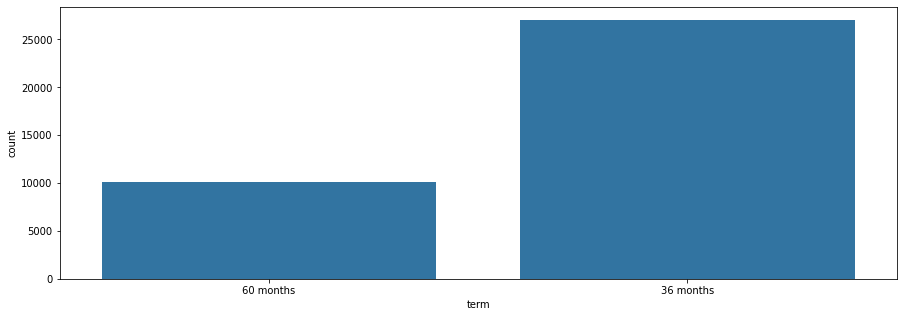

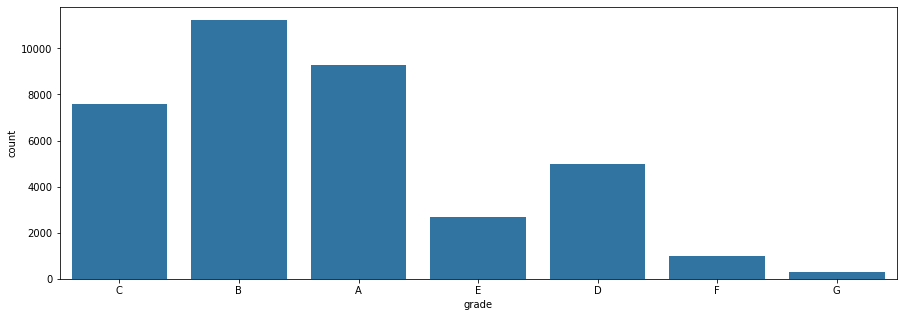

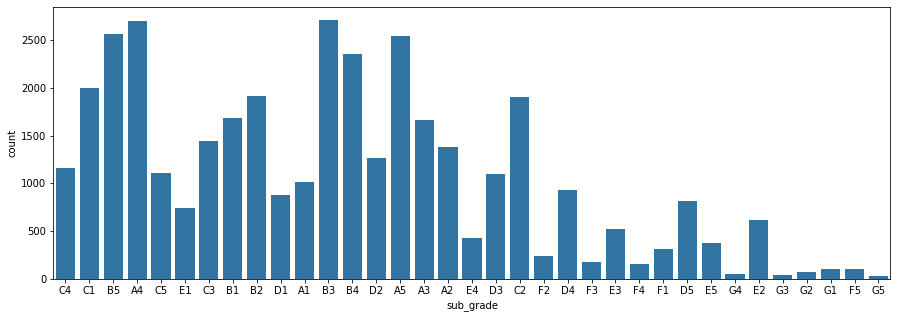

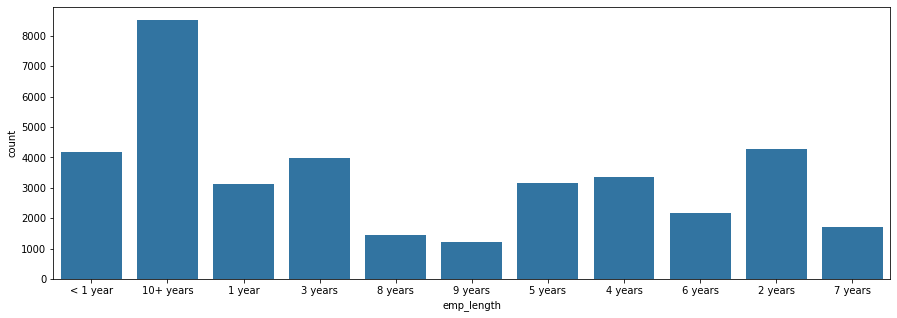

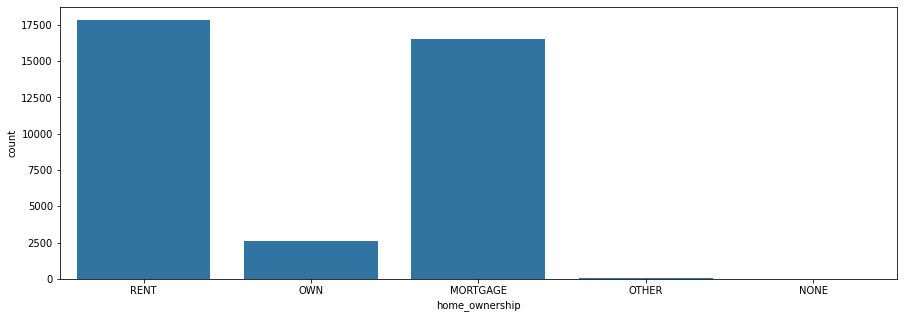

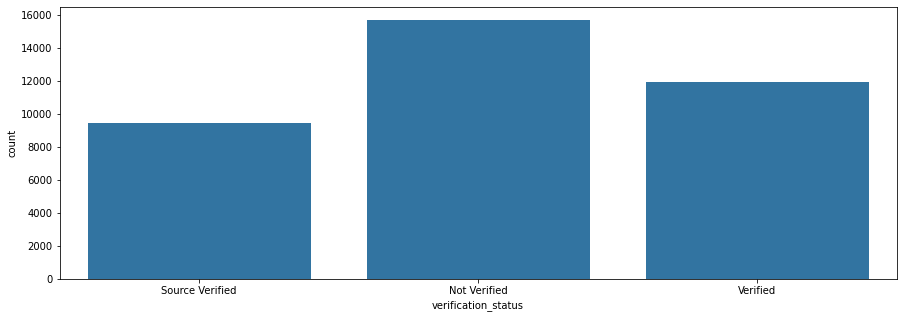

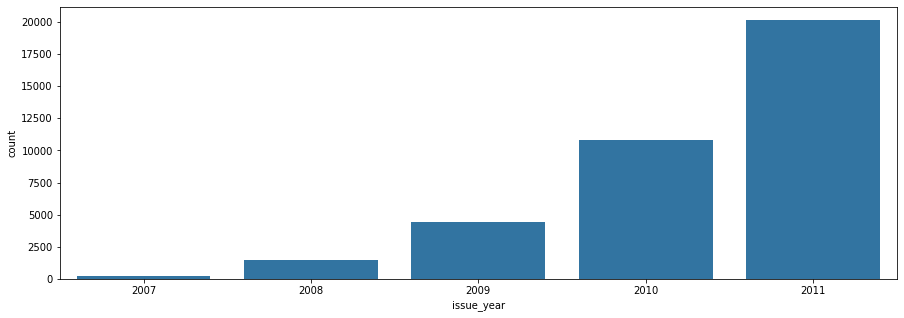

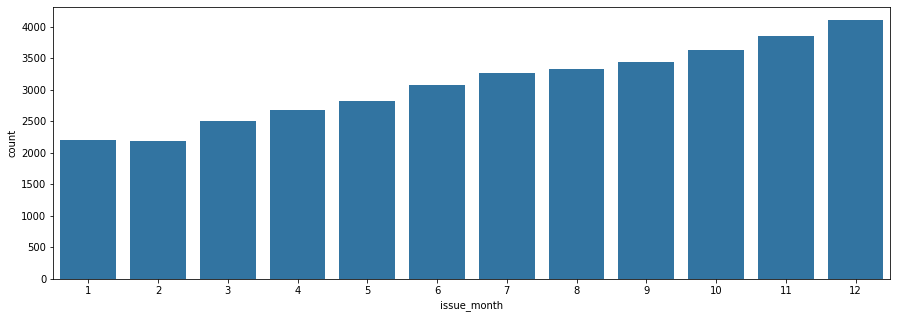

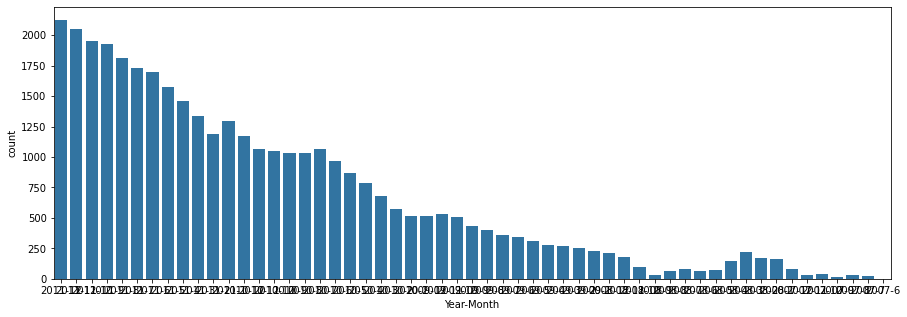

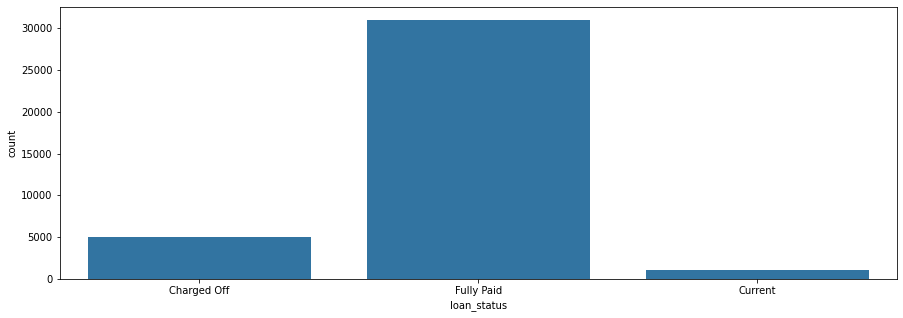

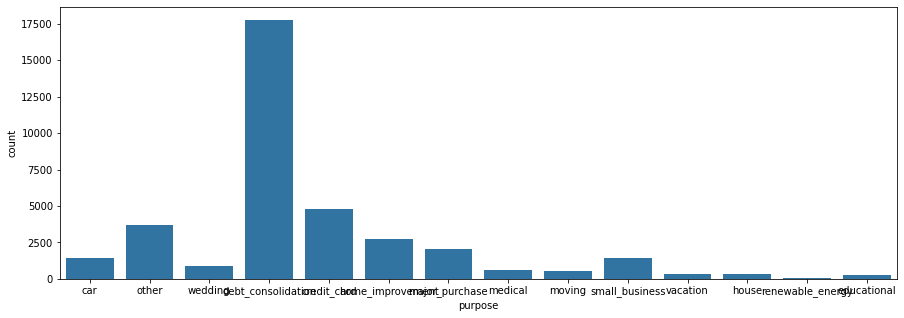

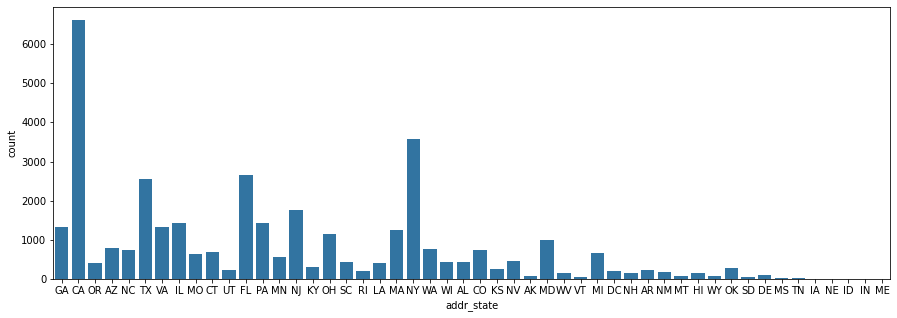

In [39]:
for col in cat_cols:
    plt.figure(figsize=(15,5))
    sns.countplot(x = df[col]  )
    plt.show()
    
    
# Drop !!!!

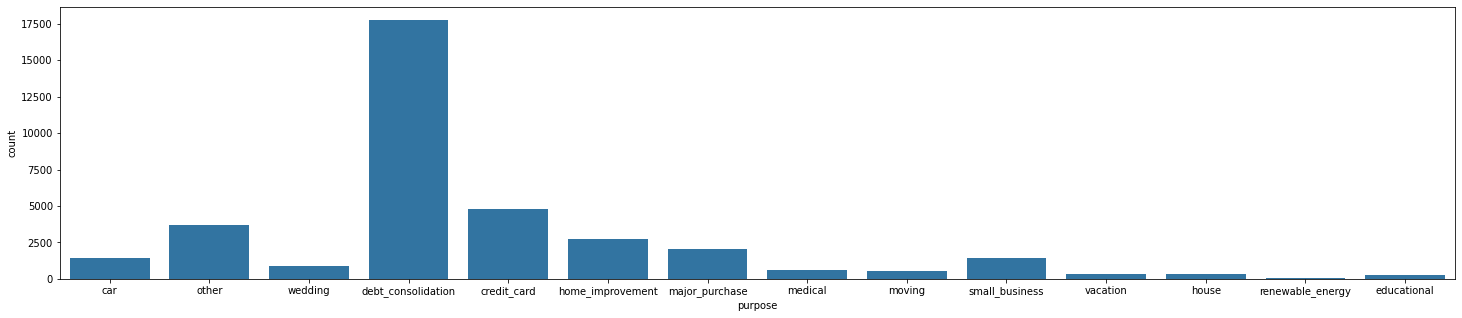

In [40]:
plt.figure(figsize=(25,5))
sns.countplot(x = df['purpose']  )
plt.show()
#ploting again with increased length

### Findings from the above charts :
#### Term chart : a majority of loans ( more than double ) have 36 months term as compared with 60 months term
#### A majority of loans lie in A, B and C category
#### maximum emp_length is 10year+
#### maximum homeownership is on rent
#### maximum loans were taken in 2011 in the month of december which is constantly increasing from the month of Jan
#### A majority of loans in the data set are fully paid which many time as compared to current and charged off cases , charged of cases are more than current cases of loan
#### A majority purchase reason is 'debt consolidation' , 'credit card' , 'other' and 'home improvement'







In [41]:
df['Year-Month'].value_counts(normalize=True)
# To check in which time period maximum loans were disbursed

Year-Month
2011-12    0.057311
2011-11    0.055208
2011-10    0.052593
2011-9     0.051892
2011-8     0.048792
2011-7     0.046690
2011-6     0.045881
2011-5     0.042457
2011-4     0.039438
2011-3     0.036096
2011-1     0.035017
2011-2     0.031971
2010-12    0.031648
2010-7     0.028682
2010-11    0.028682
2010-10    0.028197
2010-9     0.027793
2010-8     0.027766
2010-6     0.026094
2010-5     0.023480
2010-4     0.021188
2010-3     0.018304
2010-2     0.015500
2009-11    0.014395
2010-1     0.013883
2009-12    0.013829
2009-10    0.013640
2009-9     0.011780
2009-8     0.010756
2009-7     0.009732
2009-6     0.009192
2009-5     0.008276
2009-4     0.007494
2009-3     0.007198
2009-2     0.006820
2009-1     0.006173
2008-3     0.006011
2008-12    0.005769
2008-11    0.004717
2008-2     0.004529
2008-1     0.004394
2008-4     0.003909
2008-10    0.002507
2007-12    0.002157
2008-7     0.002076
2008-5     0.001887
2008-8     0.001806
2008-6     0.001644
2007-10    0.001159
2007-11  

In [42]:
pd.options.display.max_rows = 4000 
df.emp_title.value_counts(normalize=True)
#There is no clear majority but highest number of loans are atken by 'US Army'
#We will not use it for further analysis 

emp_title
US Army                               0.003585
Bank of America                       0.002938
IBM                                   0.001779
AT&T                                  0.001590
Kaiser Permanente                     0.001510
                                        ...   
BCT PRINTING                          0.000027
West Virginia Choice                  0.000027
Parternships To Uplift Communities    0.000027
Hydra Force Inc.                      0.000027
Evergreen Center                      0.000027
Name: proportion, Length: 28689, dtype: float64

In [43]:
df_charged_off = df[df['loan_status']=='Charged Off']
df_fully_paid = df[df['loan_status']=='Fully Paid']

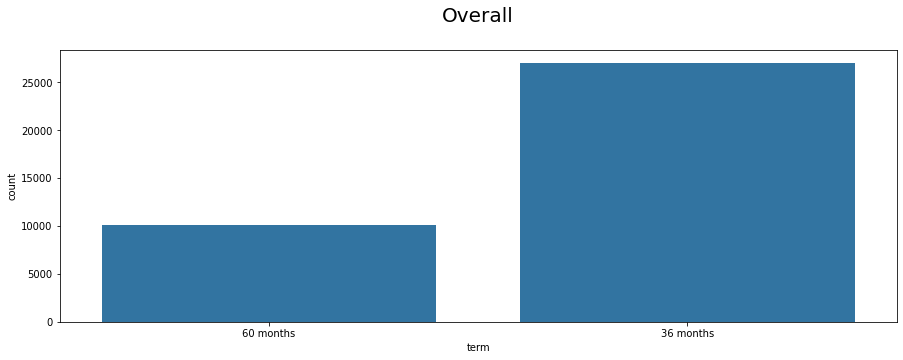

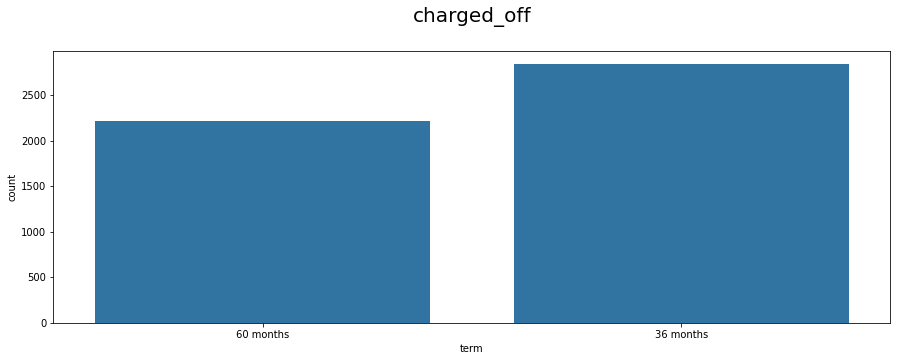

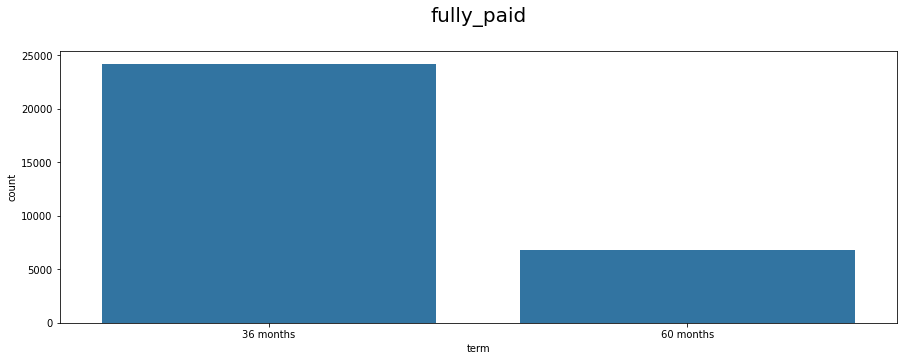

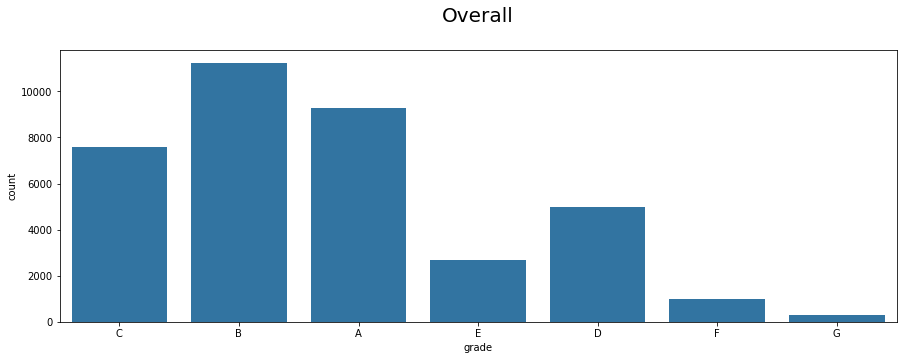

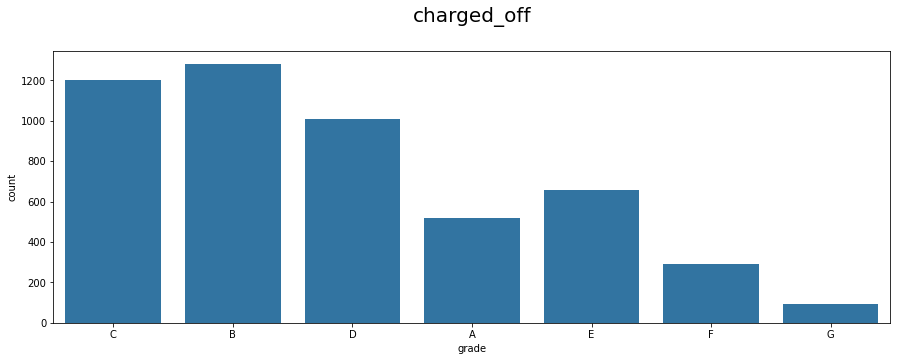

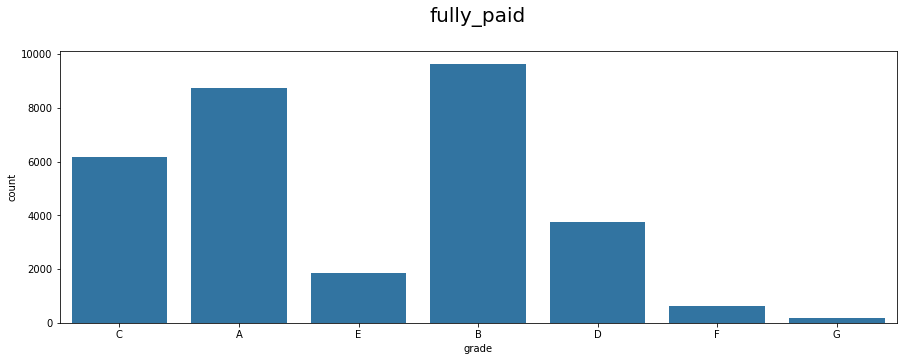

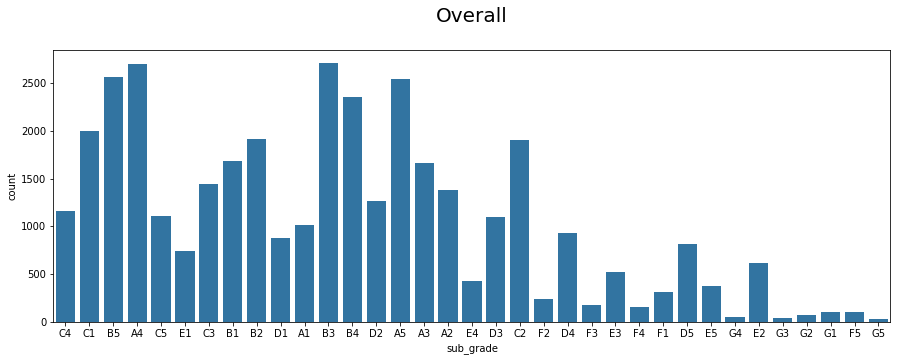

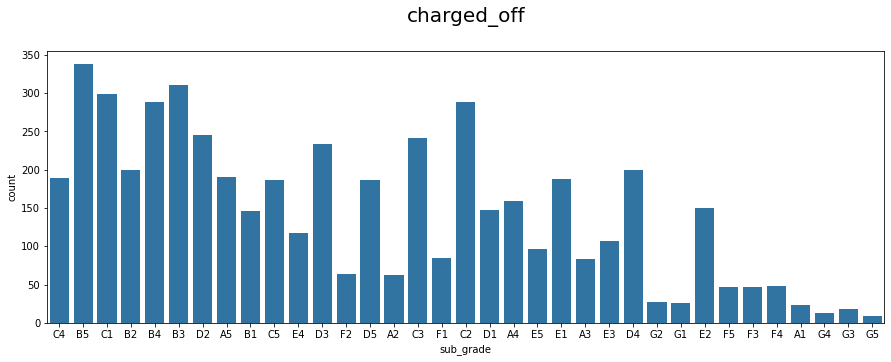

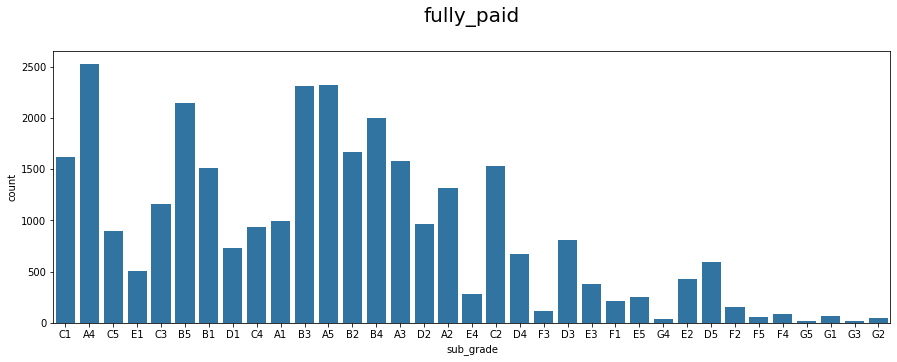

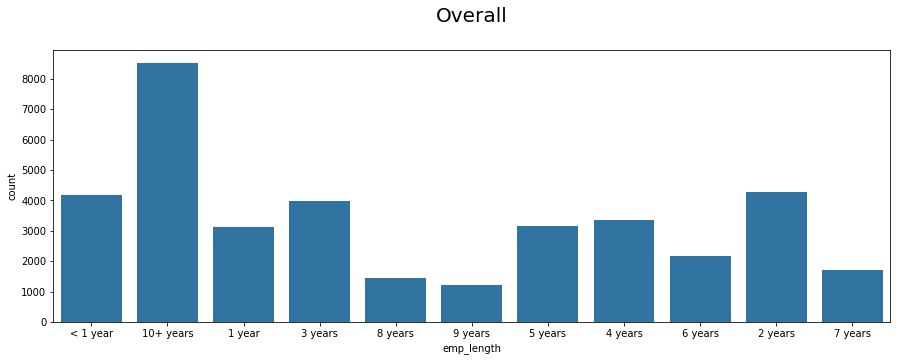

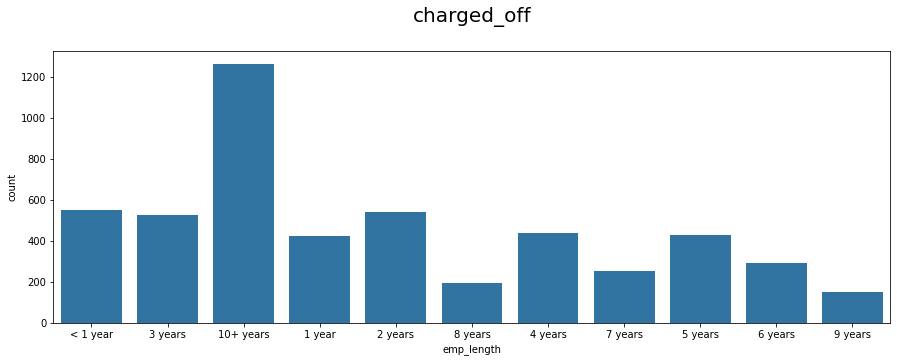

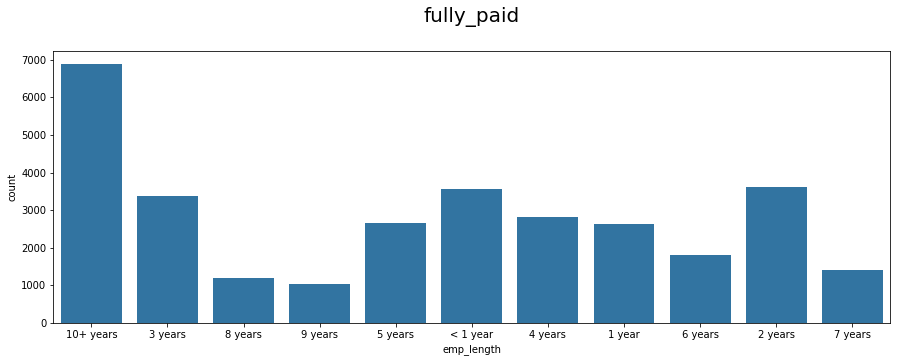

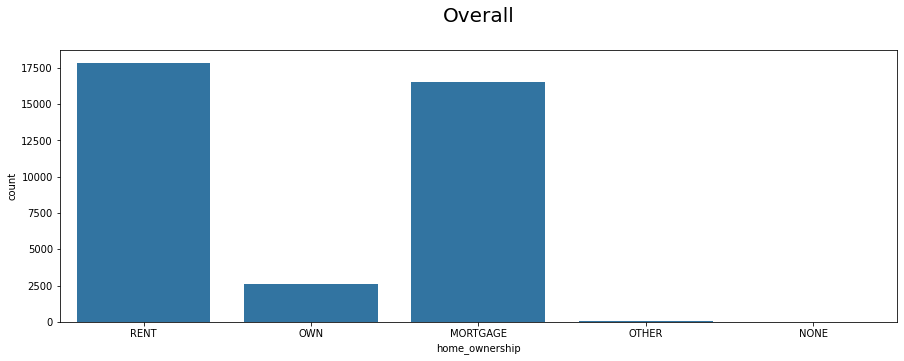

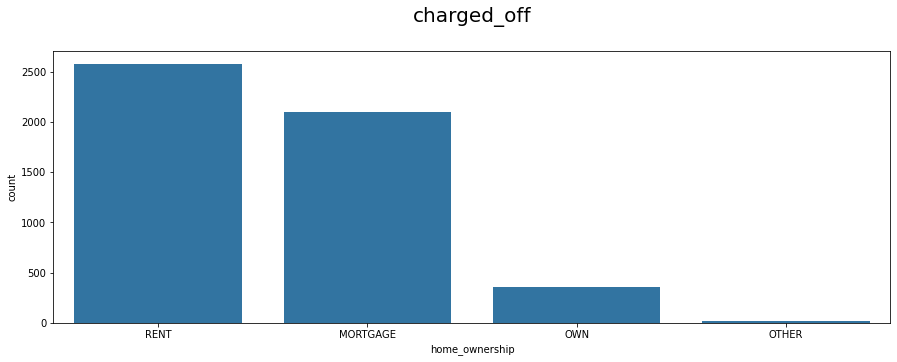

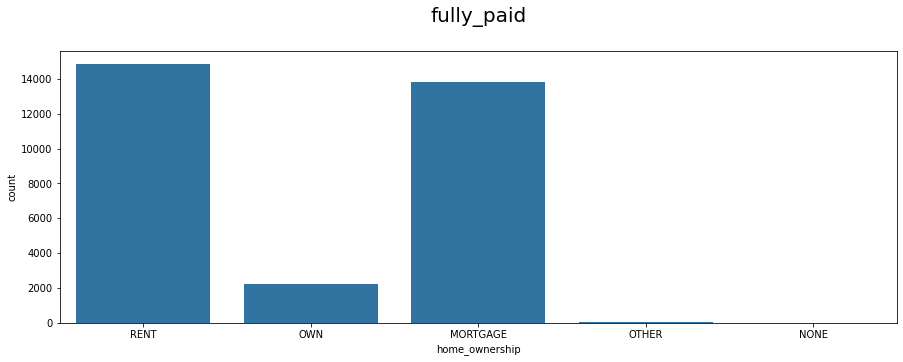

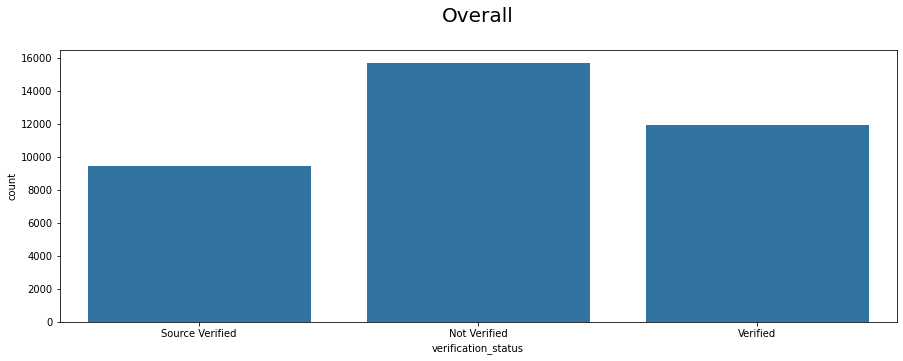

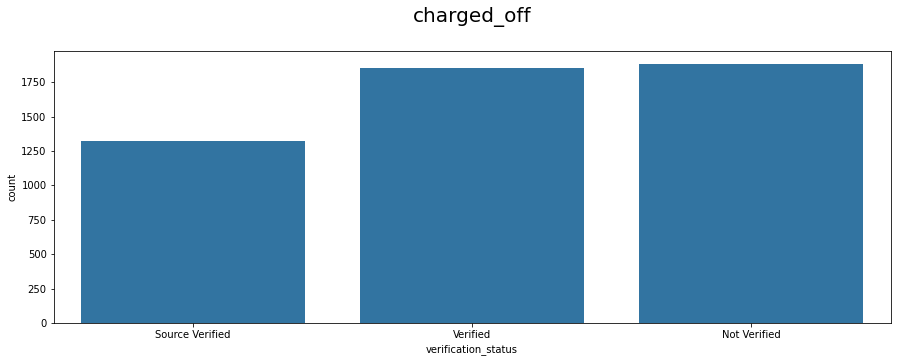

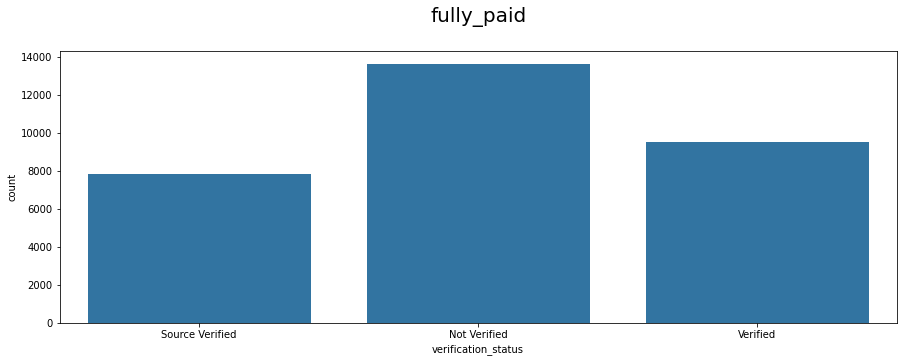

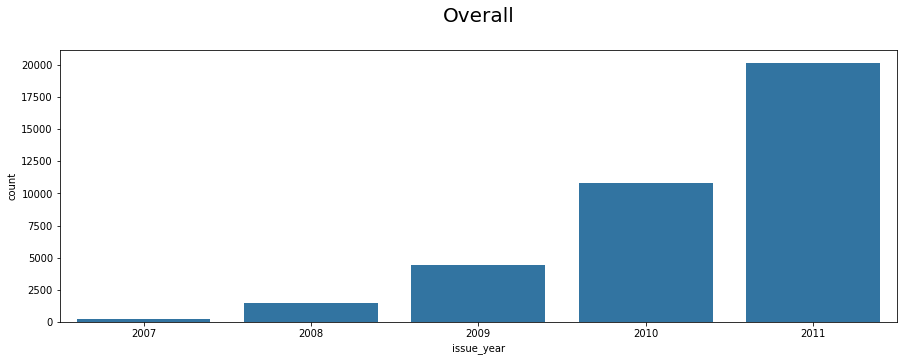

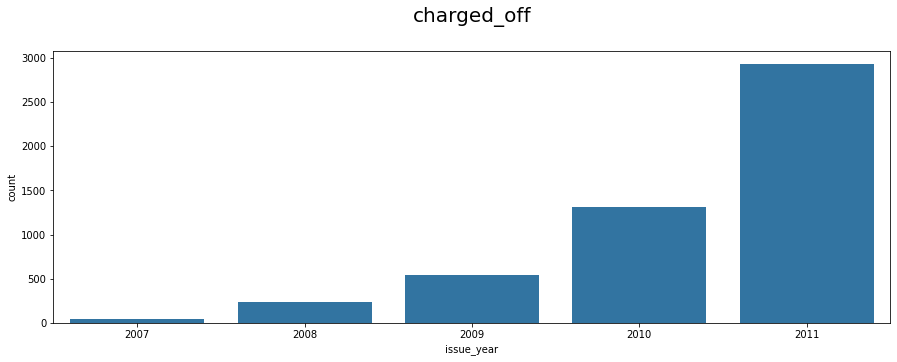

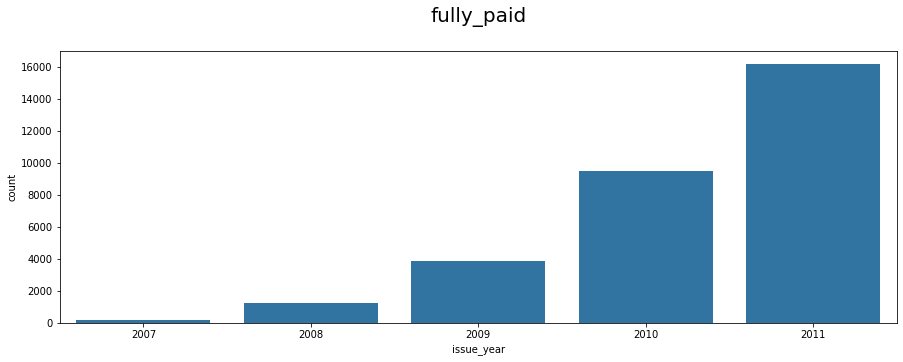

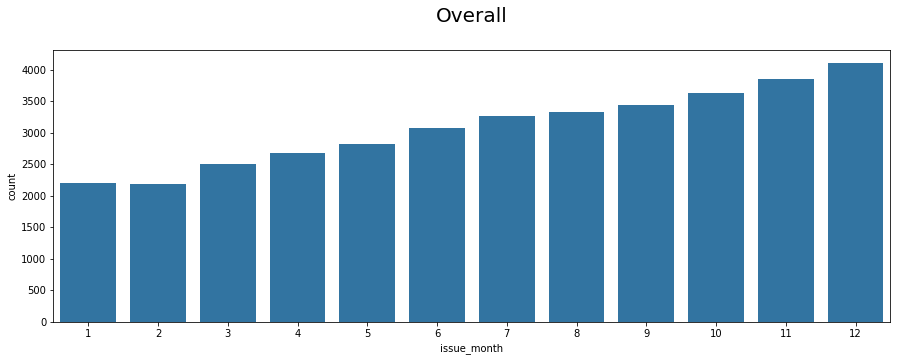

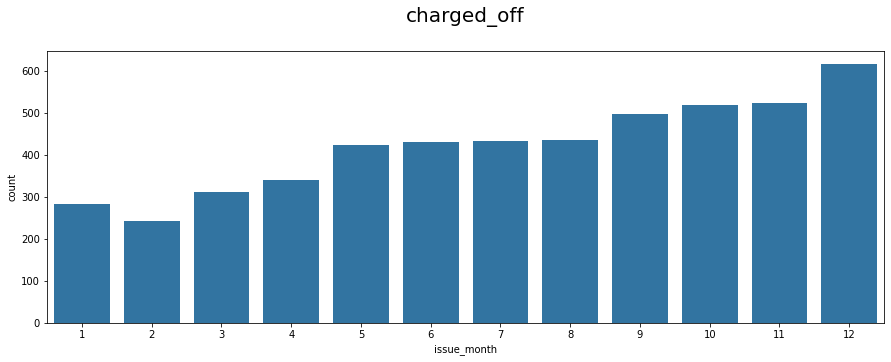

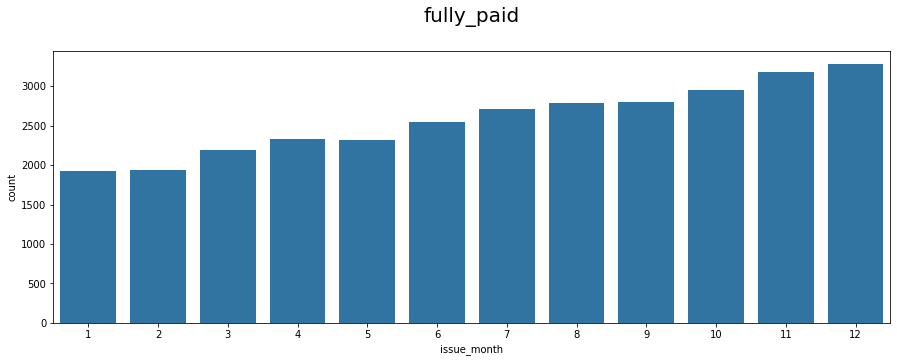

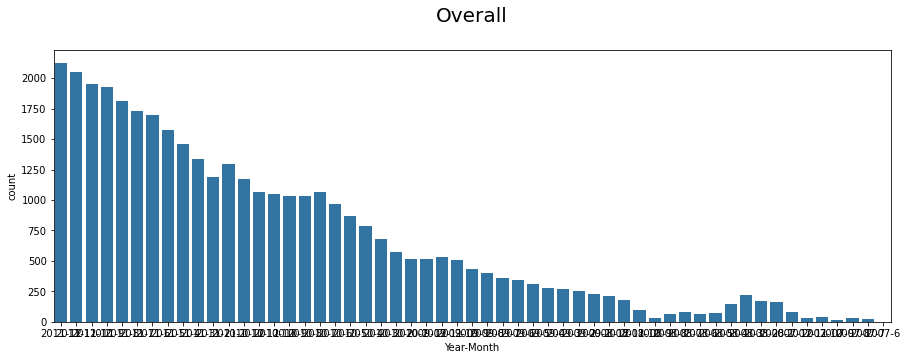

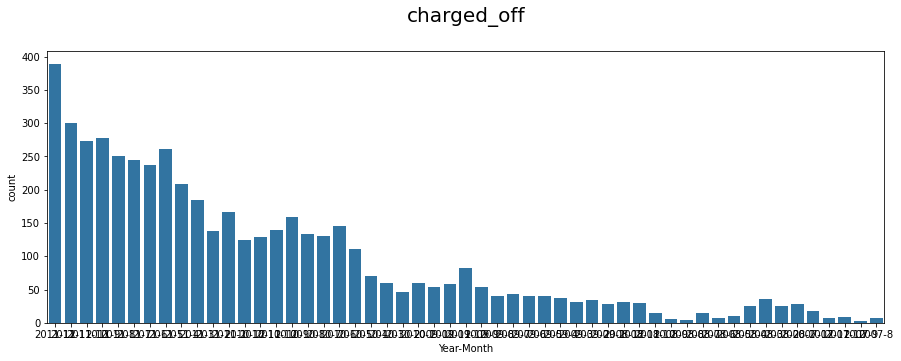

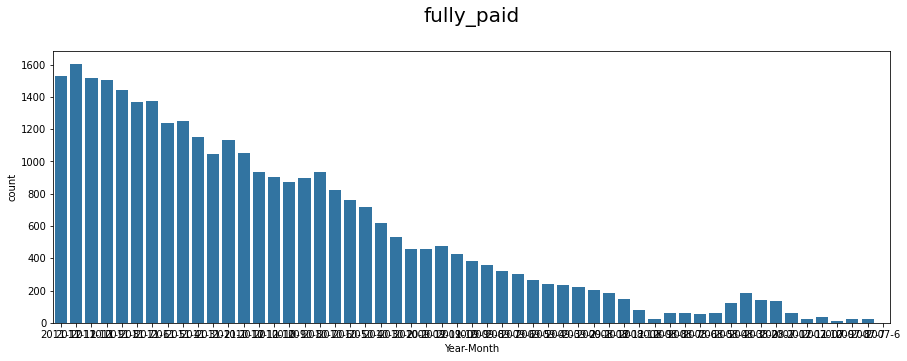

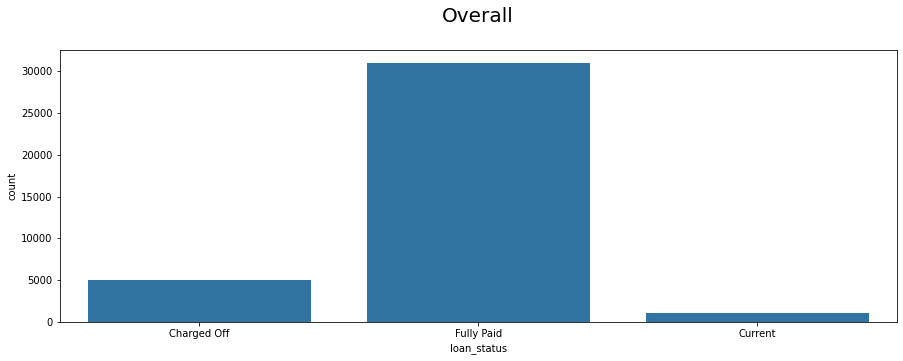

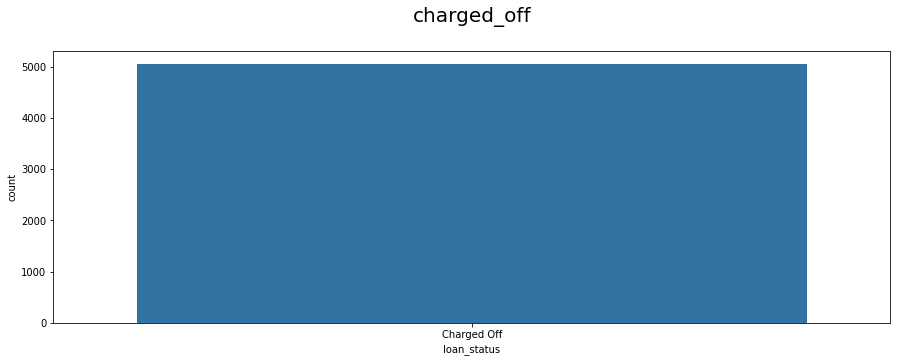

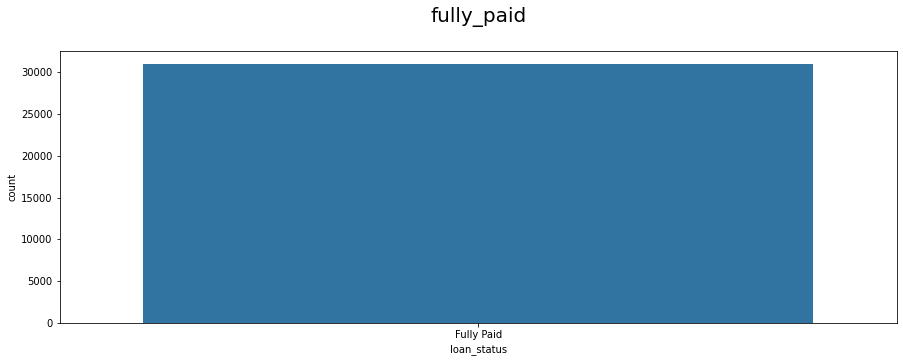

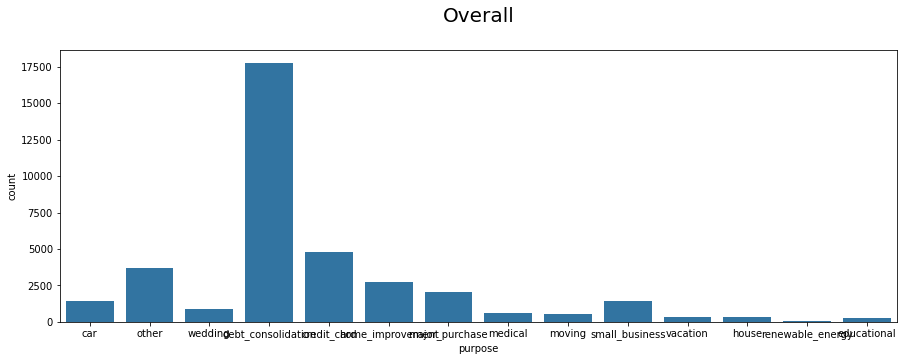

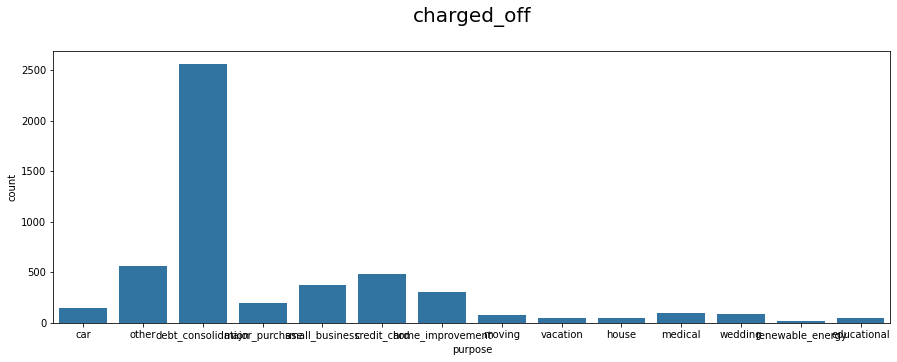

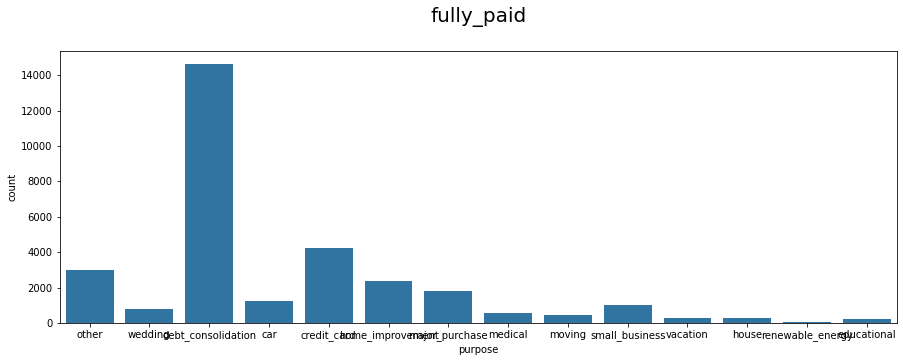

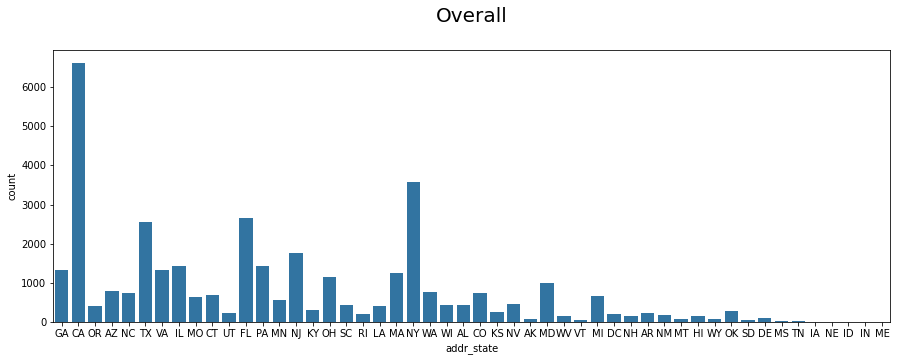

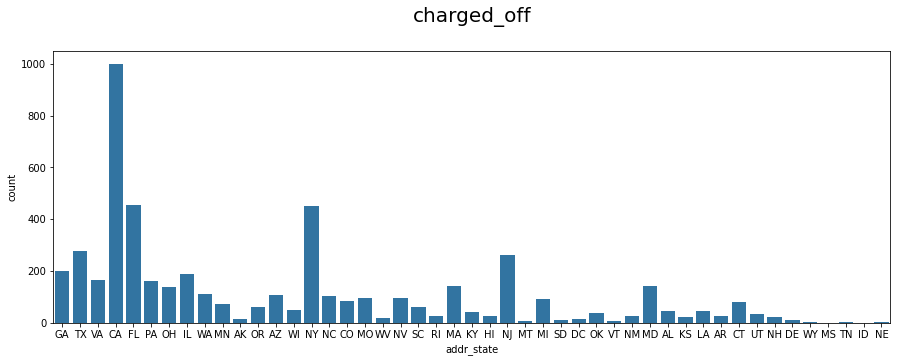

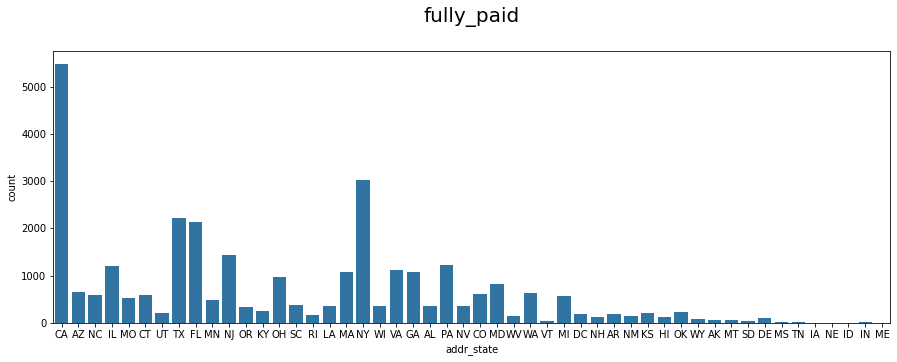

In [44]:
for col in cat_cols:
    plt.figure(figsize=(15,5))
    sns.countplot(x = df[col]  )
    plt.title("Overall\n", fontdict={'fontsize': 20, 'fontweight' : 5, })
    plt.show()
    plt.figure(figsize=(15,5))
    sns.countplot(x = df_charged_off[col]  )
    plt.title("charged_off\n", fontdict={'fontsize': 20, 'fontweight' : 5, })
    plt.show()
    plt.figure(figsize=(15,5))
    sns.countplot(x = df_fully_paid[col]  )
    plt.title("fully_paid\n", fontdict={'fontsize': 20, 'fontweight' : 5, })
    plt.show()

## Points to note :
### There is clear relationship in "term of the loan" and "loan status" - looks like signifiantly high % of customers who defaulted has tem = 60 months
### When we see grade vs loan status ; as grade increases( going from A to G) % of charged off loan status increase
### We have to deep dive into the relationship of purpose and loan status looks like some of the purchase reasons are more prone to loan default
### There doesn't seem to a much of a difference in % of verfication staus and loan status

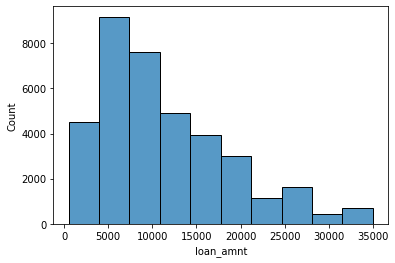

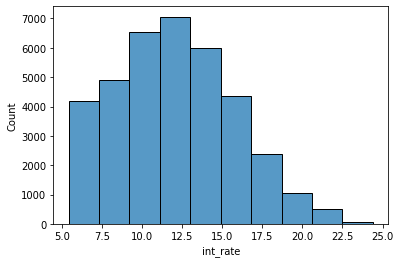

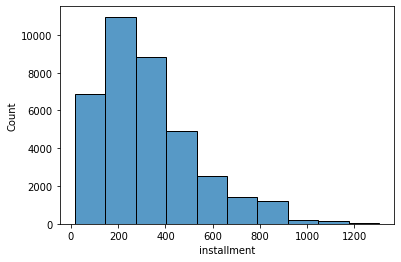

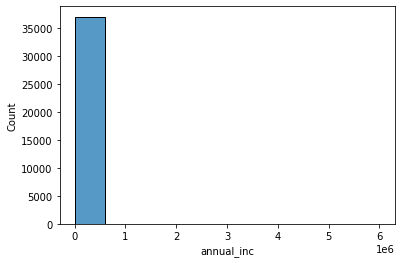

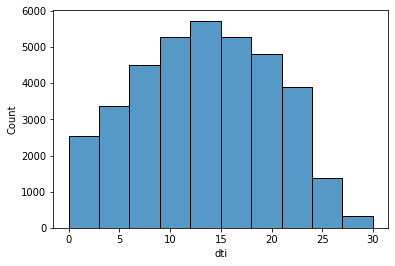

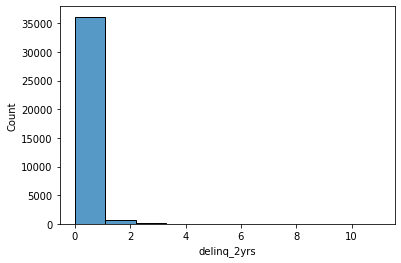

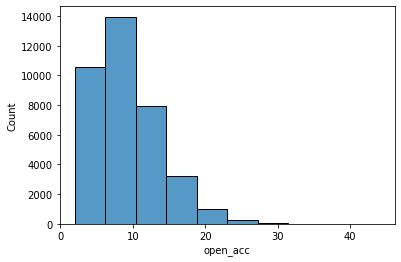

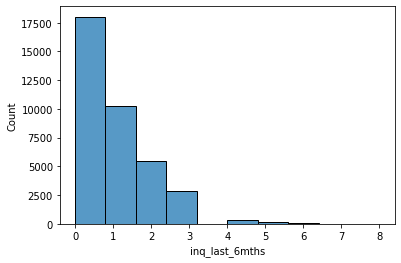

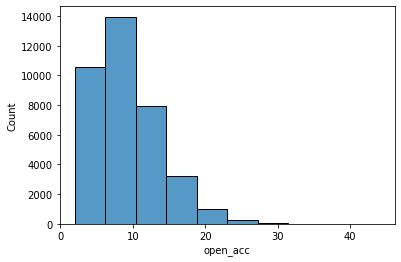

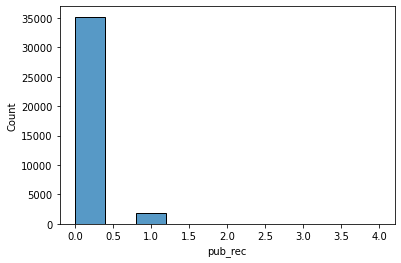

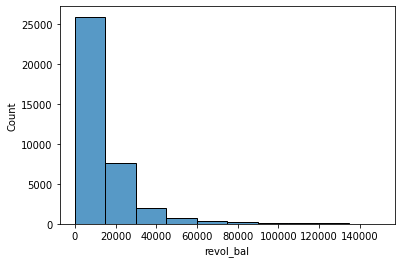

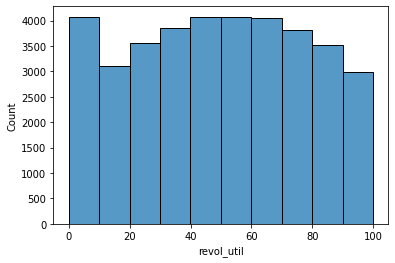

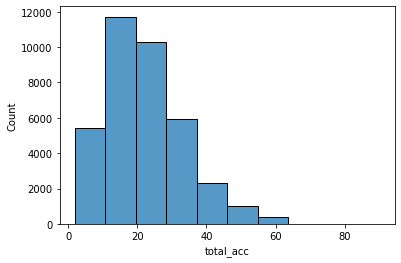

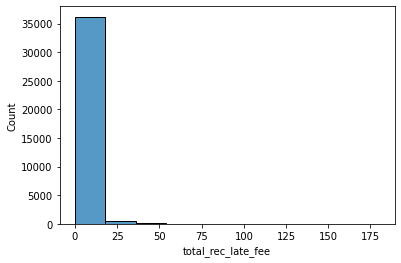

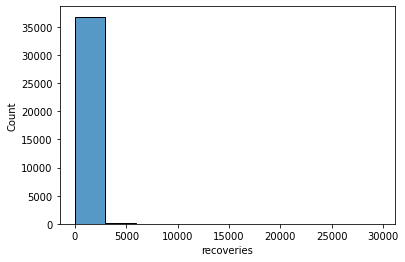

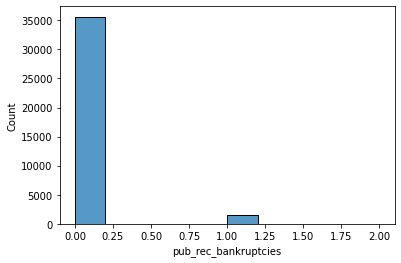

In [45]:
for col in cont_cols:
    sns.histplot(df[col] ,  bins =10)
    plt.show()

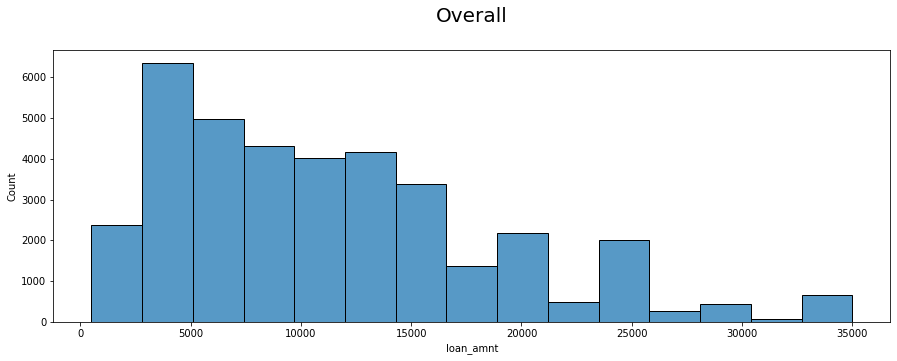

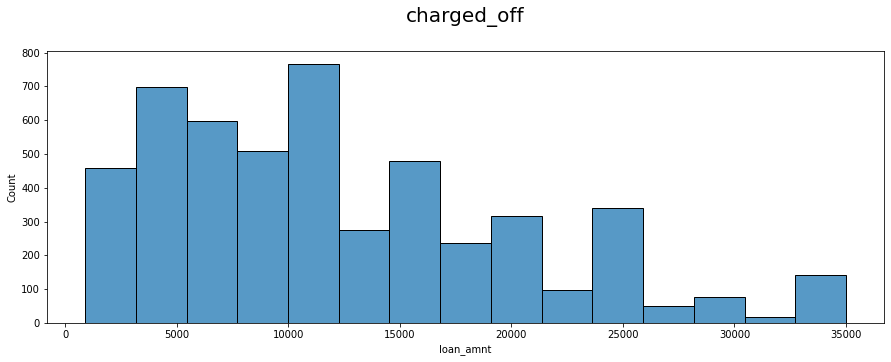

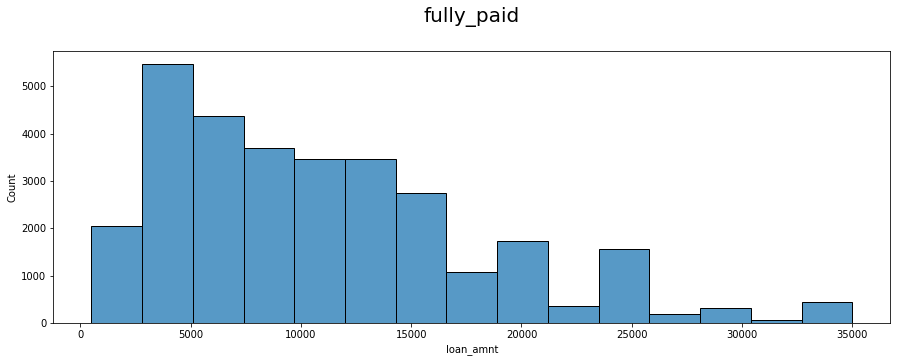

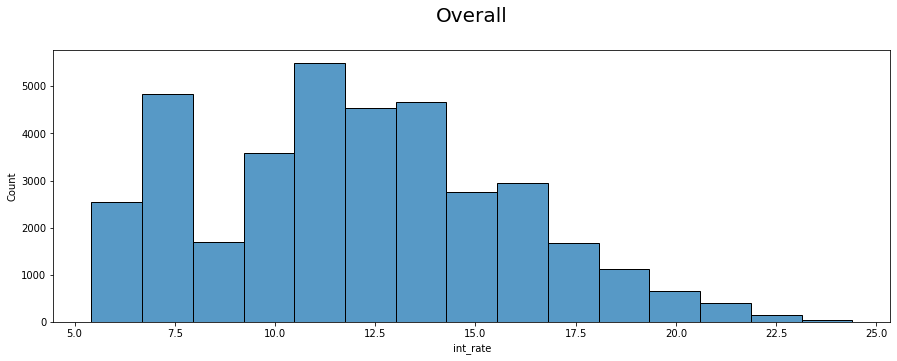

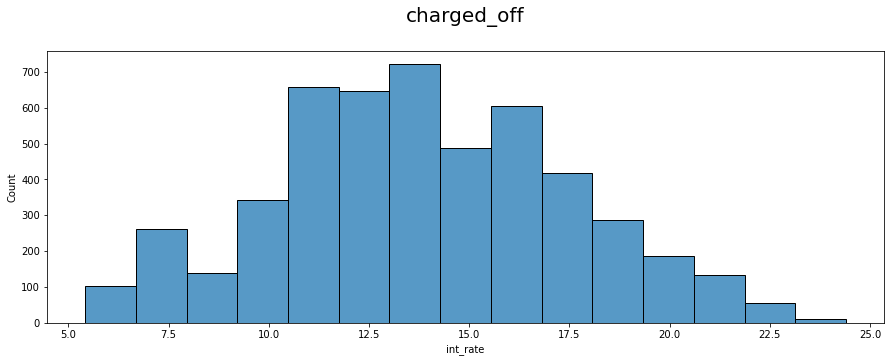

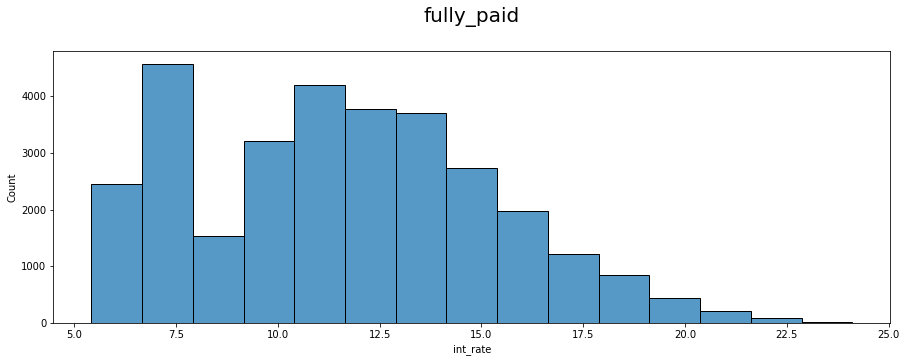

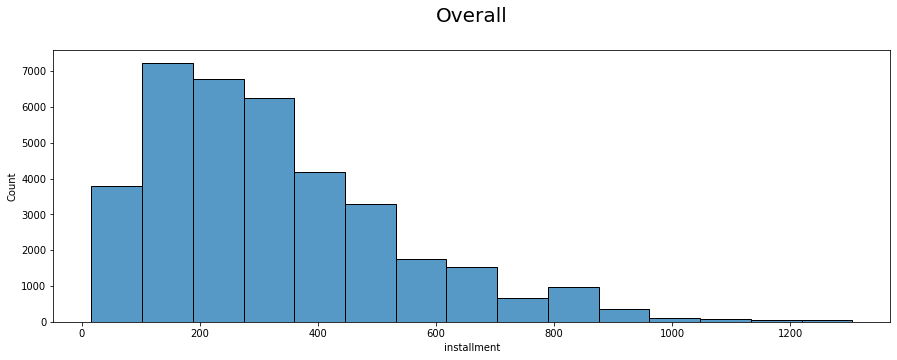

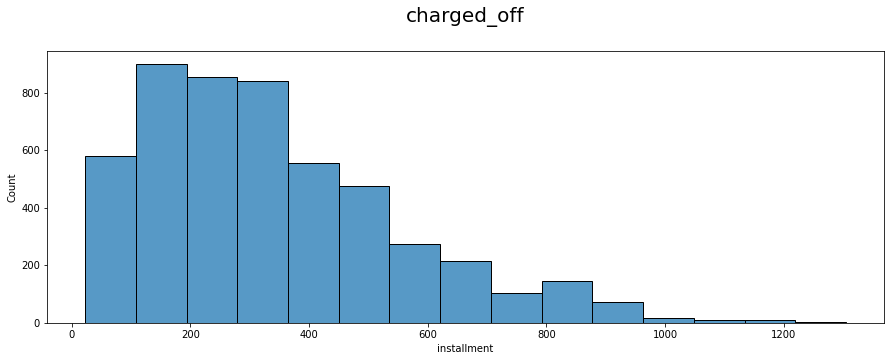

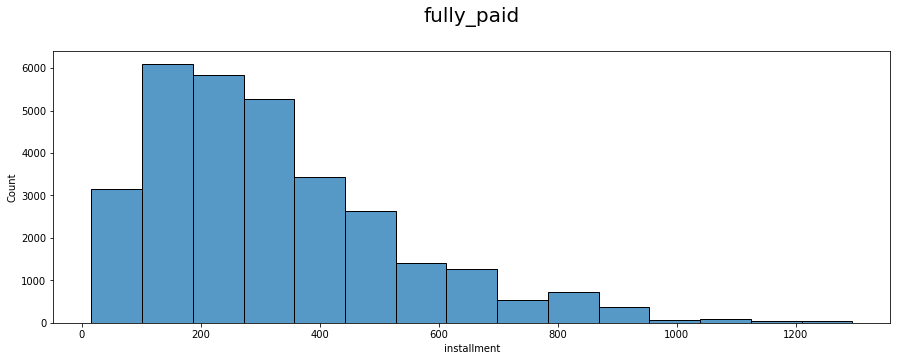

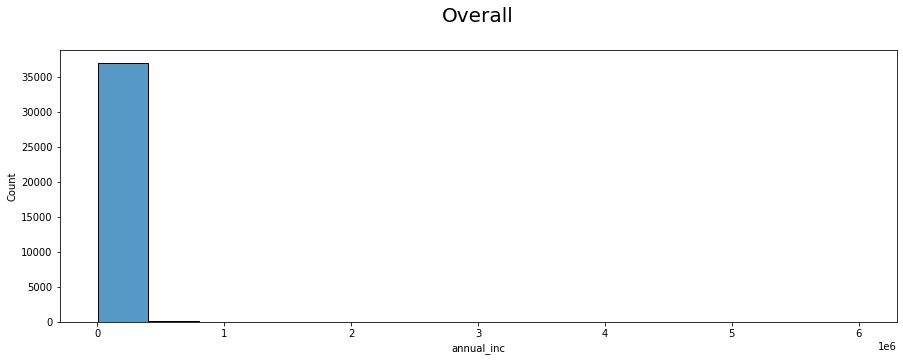

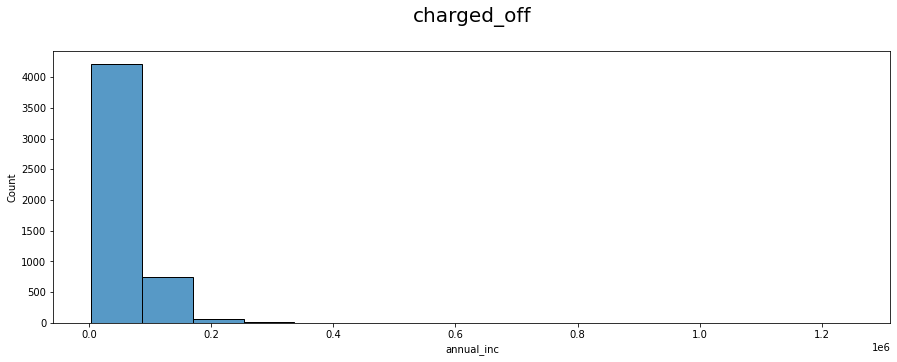

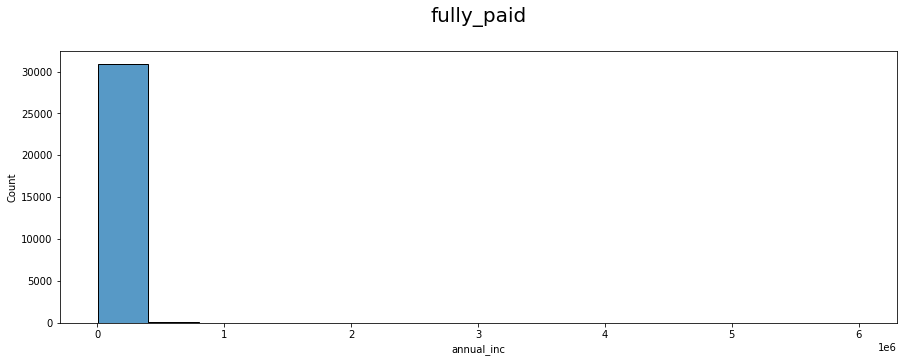

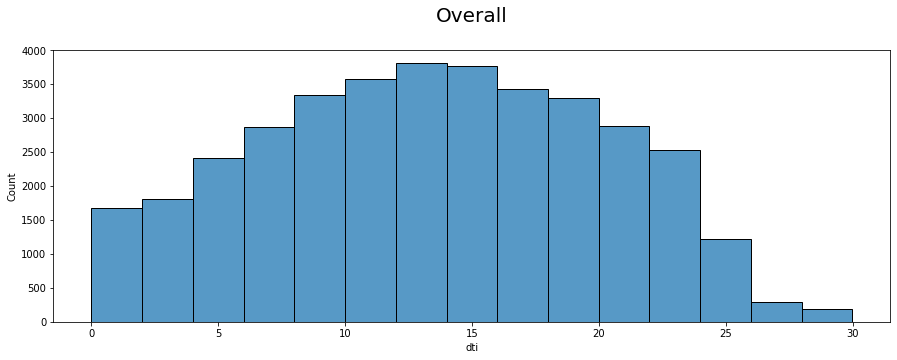

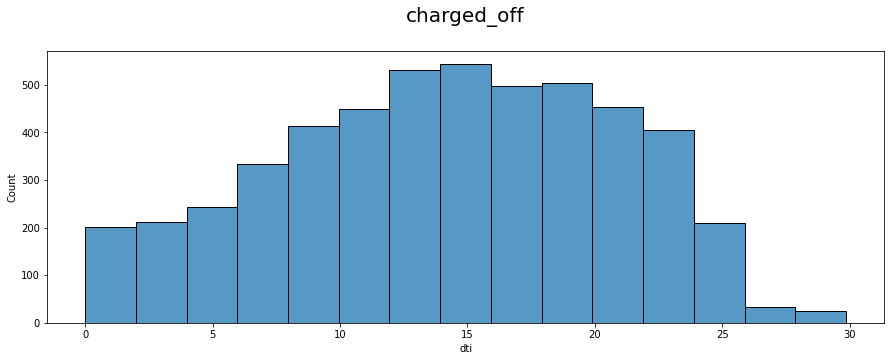

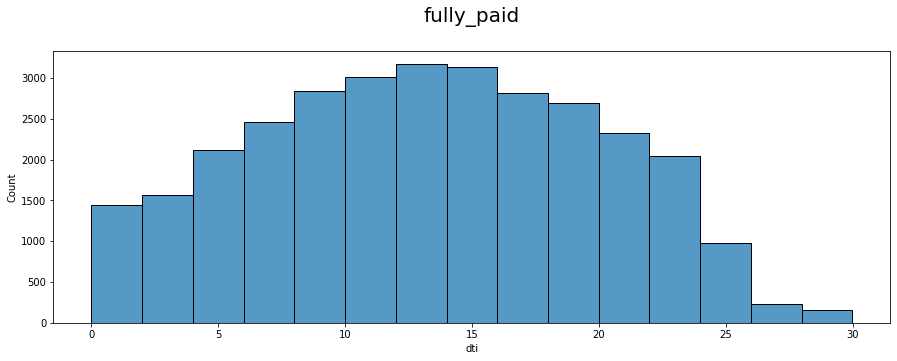

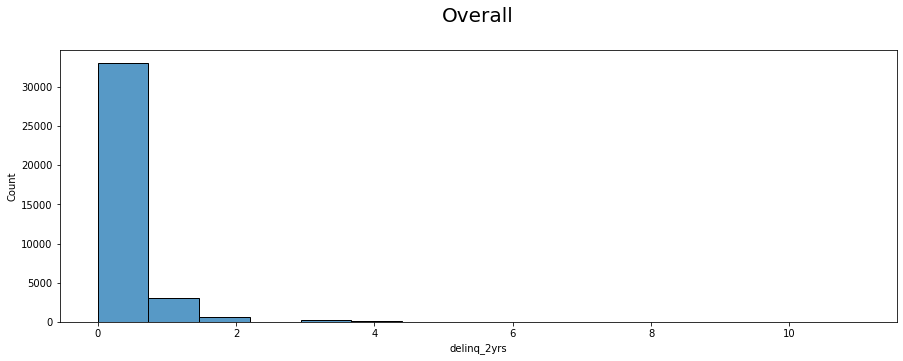

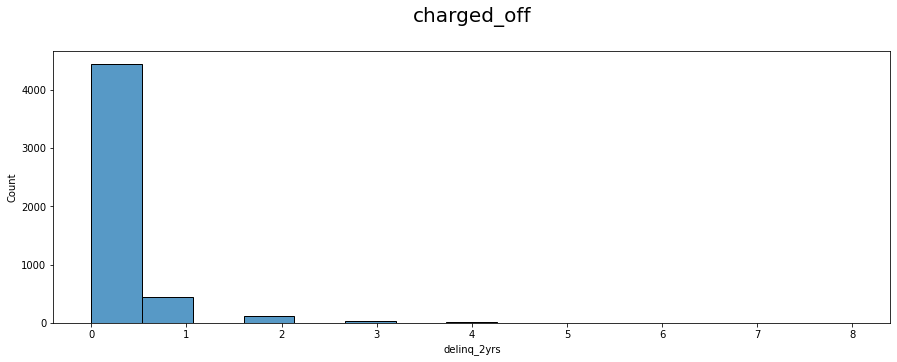

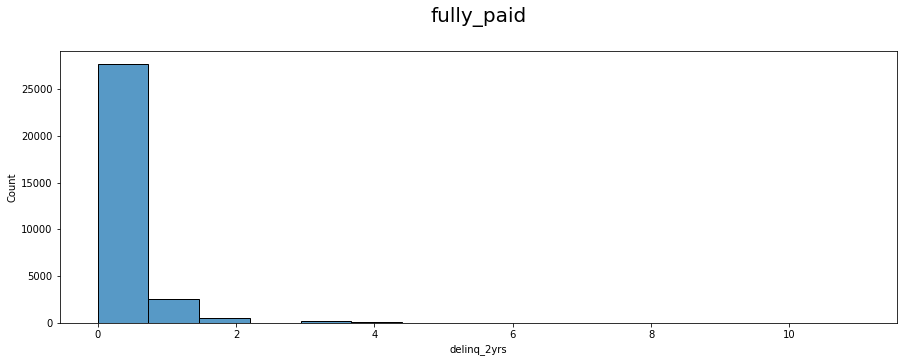

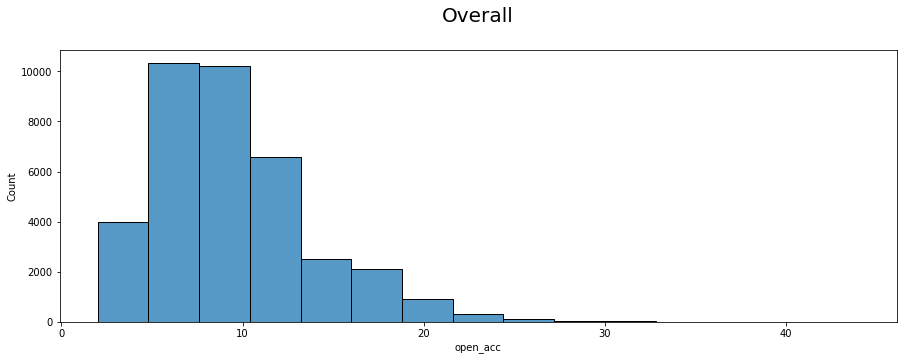

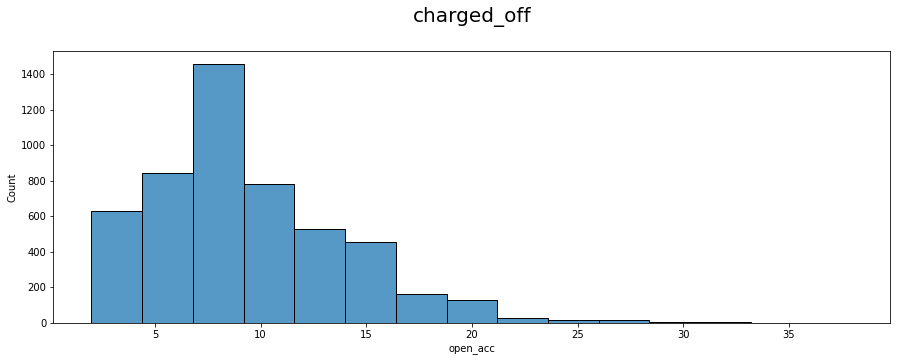

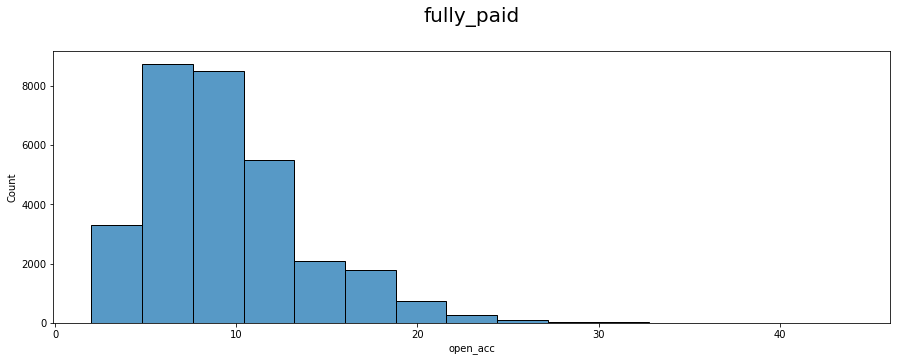

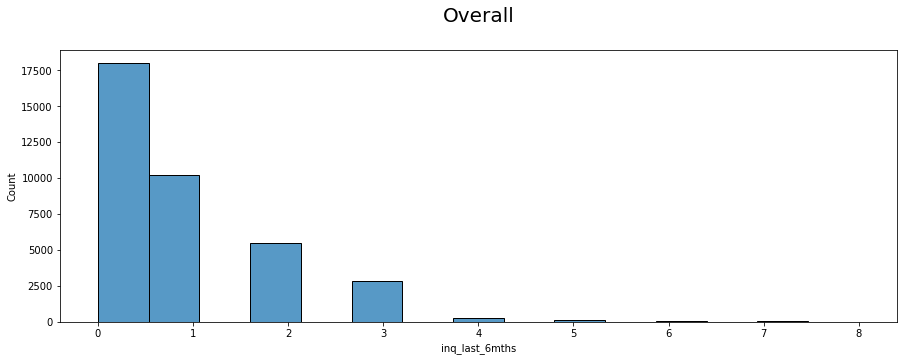

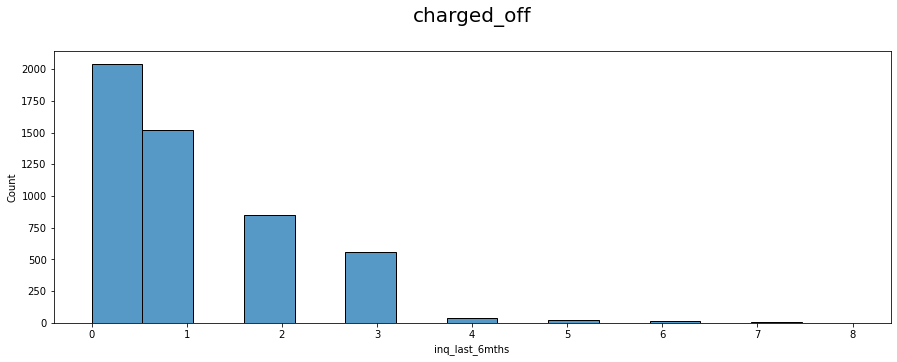

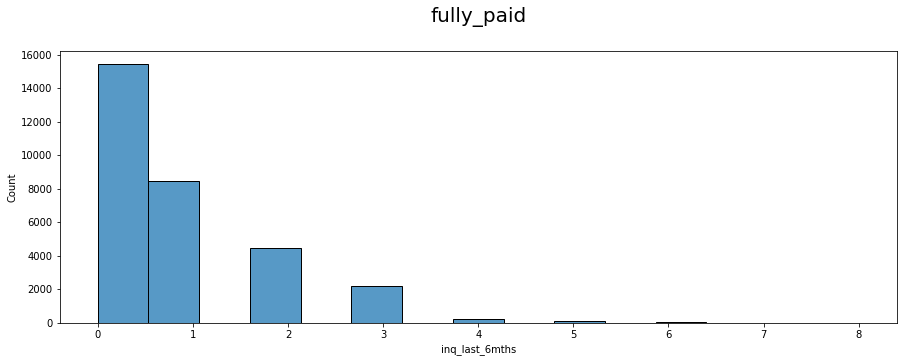

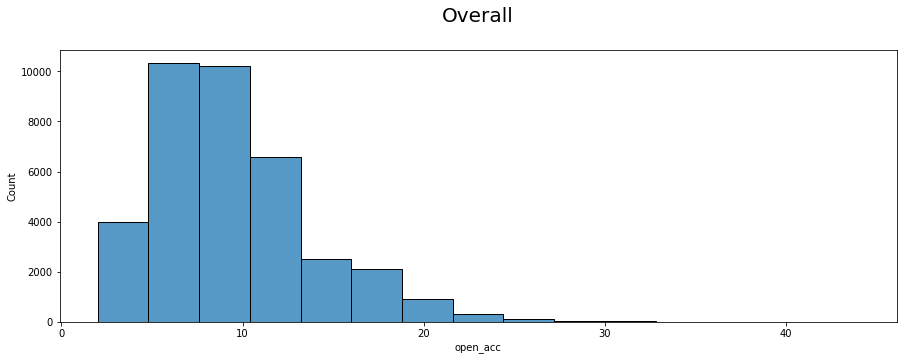

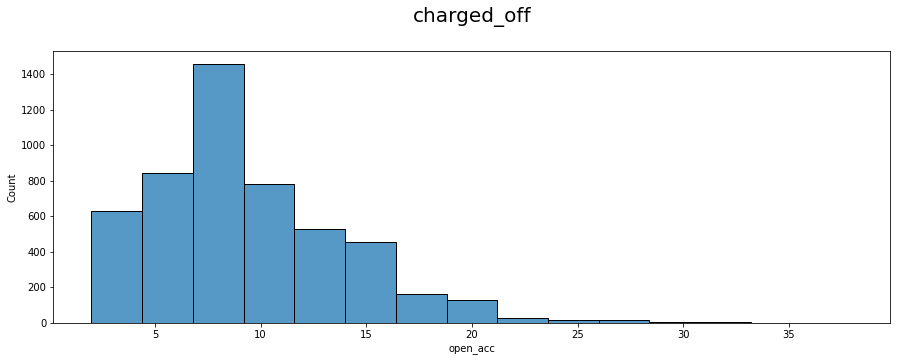

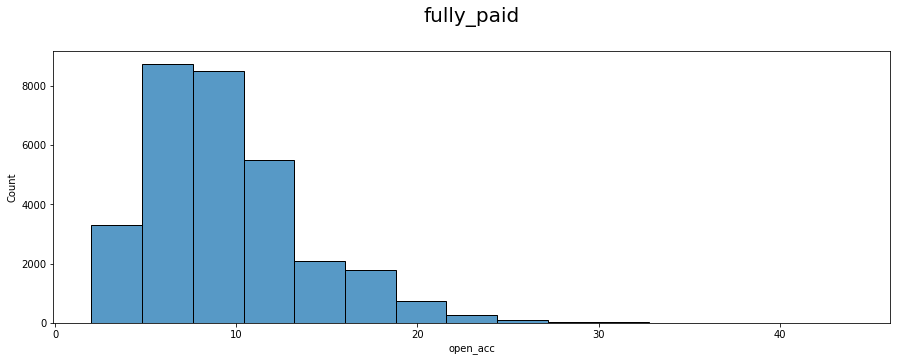

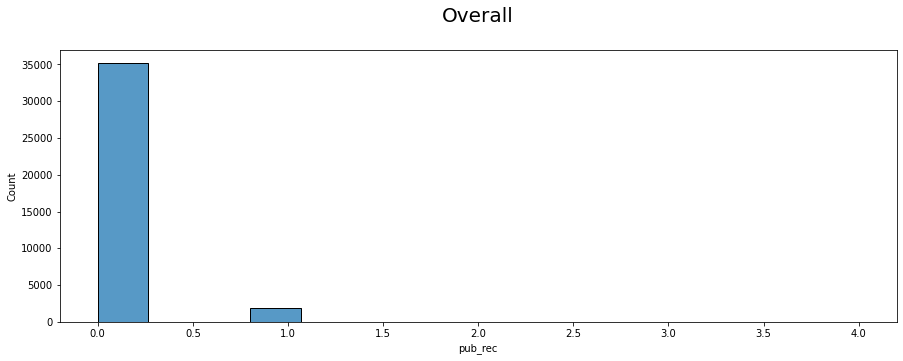

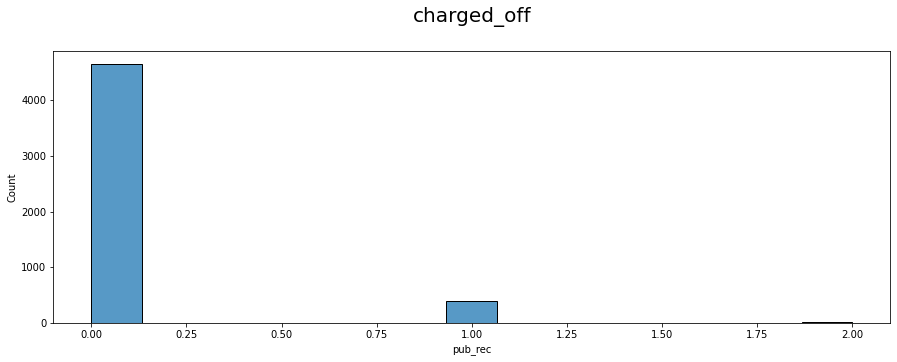

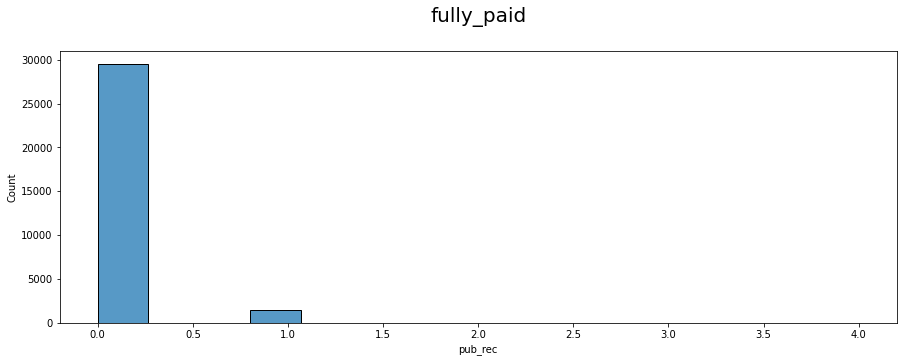

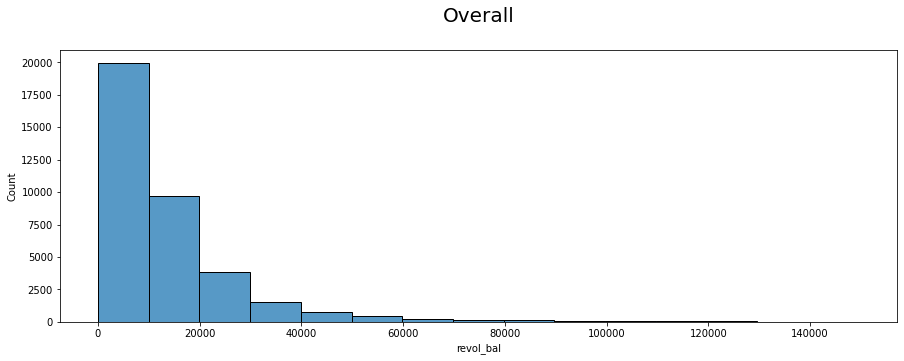

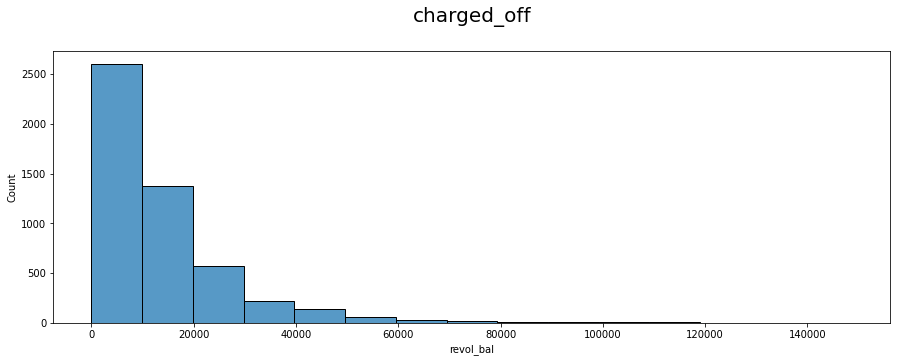

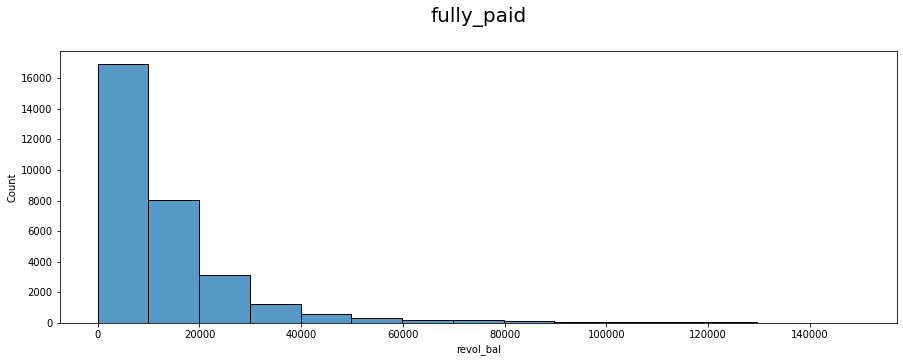

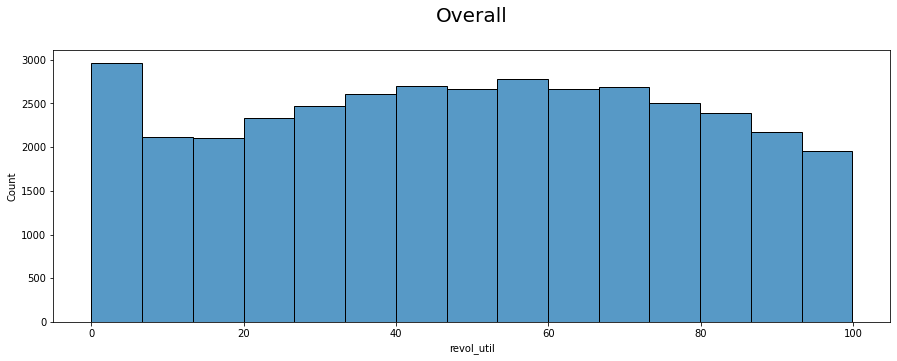

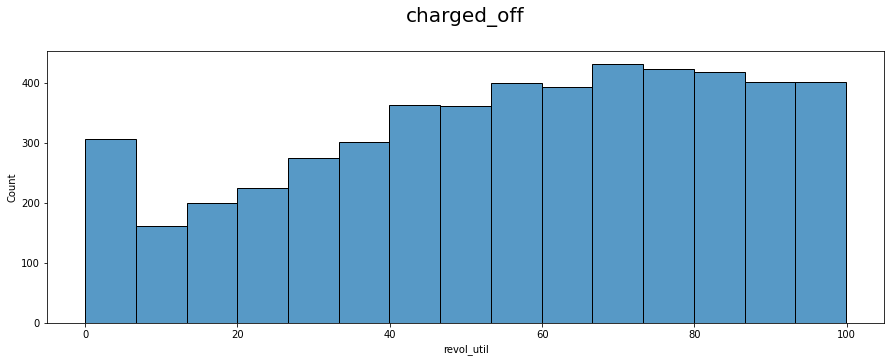

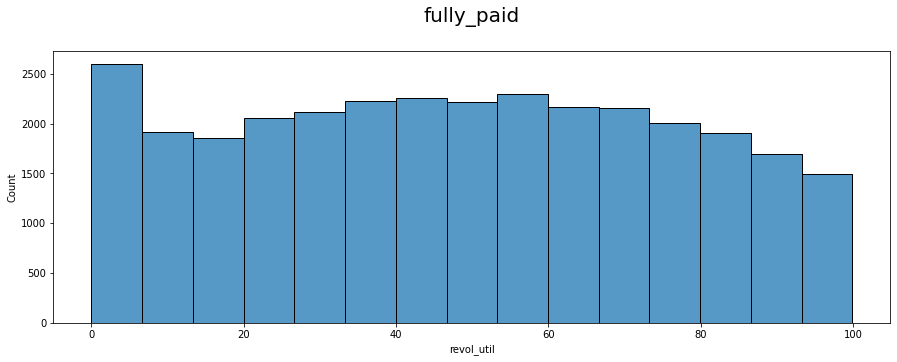

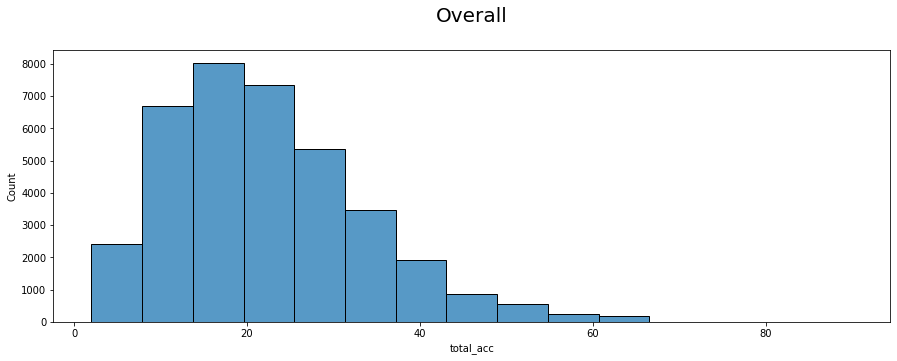

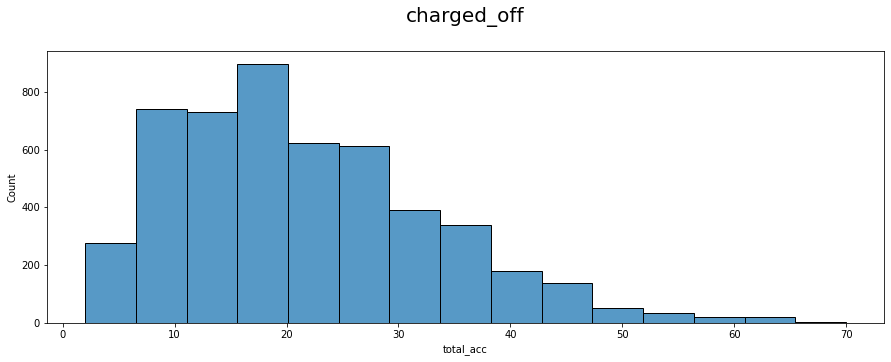

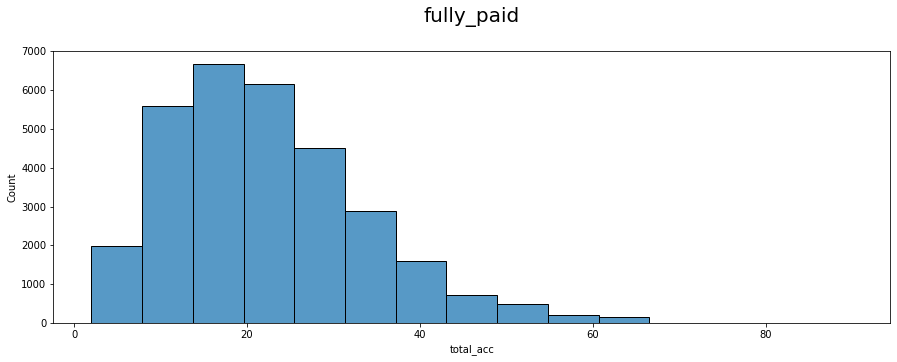

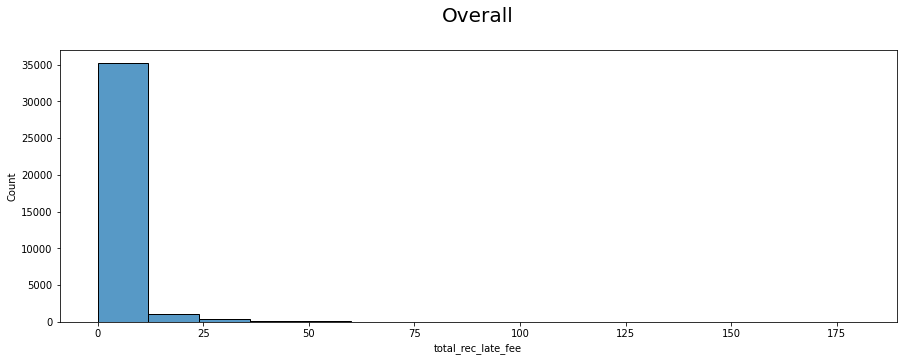

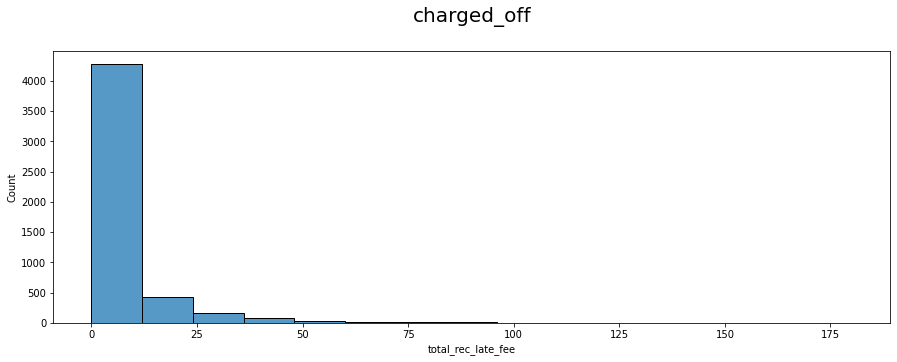

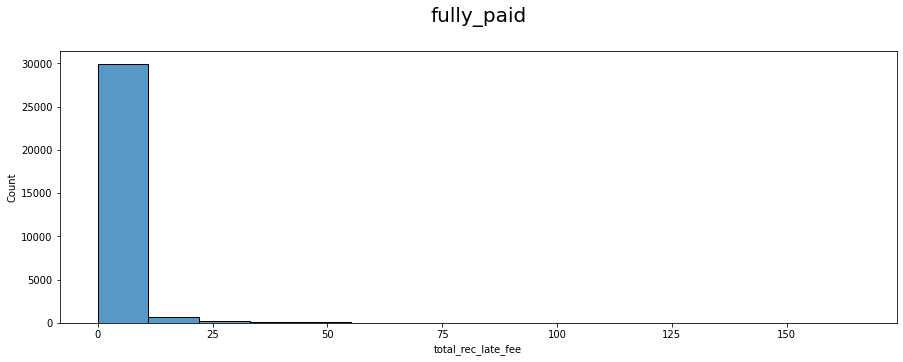

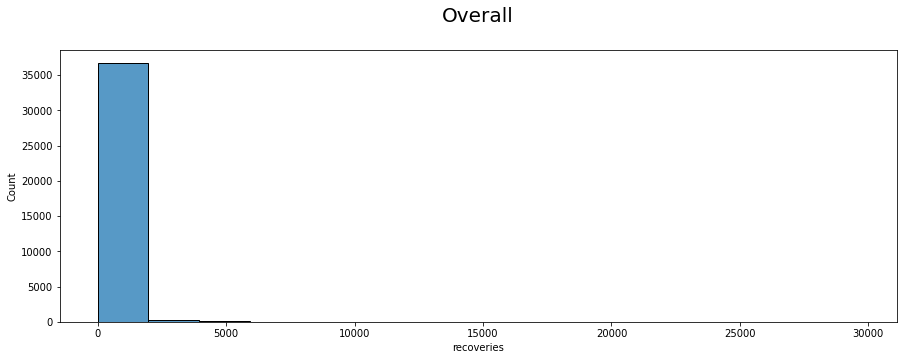

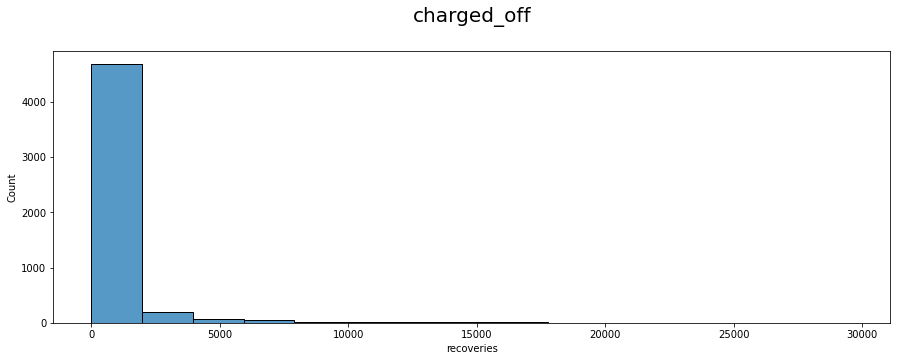

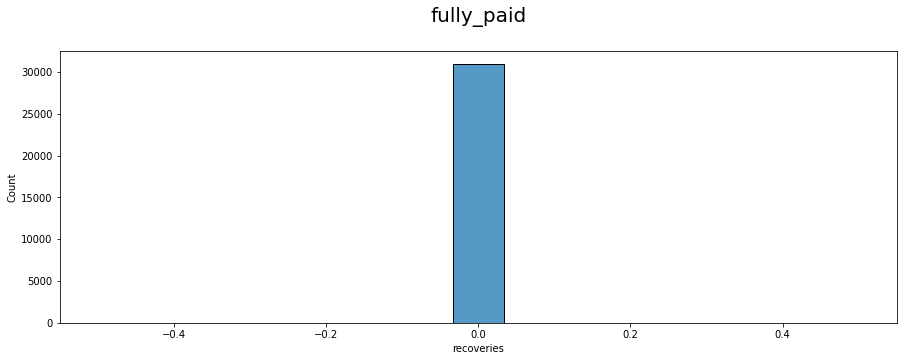

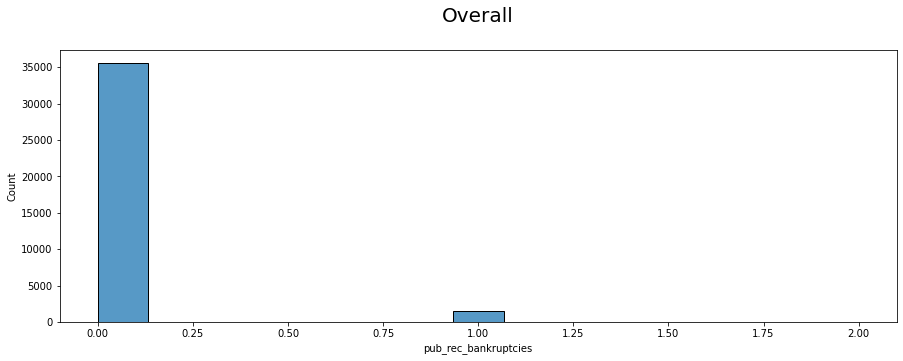

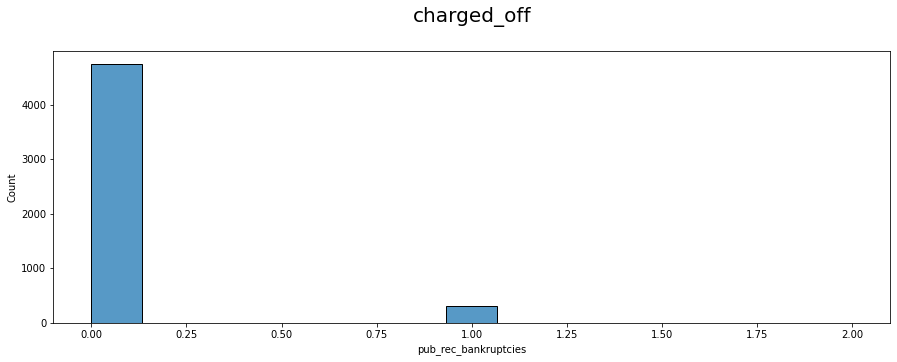

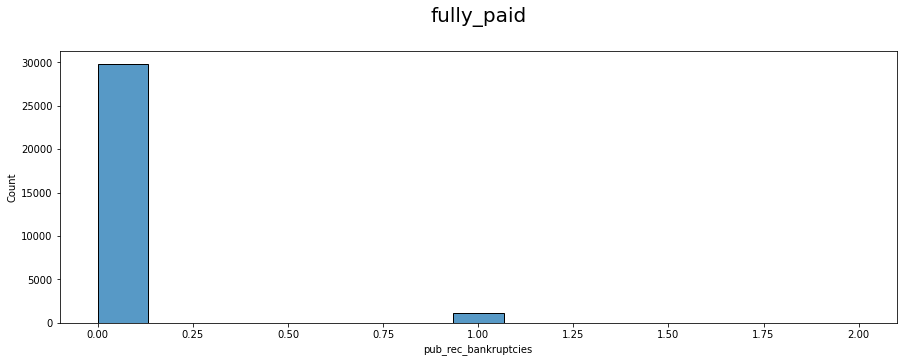

In [46]:
for col in cont_cols:
    plt.figure(figsize=(15,5))
    sns.histplot(x = df[col] ,  bins =15)
    plt.title("Overall\n", fontdict={'fontsize': 20, 'fontweight' : 5, })
    plt.show()
    plt.figure(figsize=(15,5))

    sns.histplot(x = df_charged_off[col] ,  bins =15)
    plt.title("charged_off\n", fontdict={'fontsize': 20, 'fontweight' : 5, })
    plt.show()
    plt.figure(figsize=(15,5))
    sns.histplot(x = df_fully_paid[col] ,  bins =15)
    plt.title("fully_paid\n", fontdict={'fontsize': 20, 'fontweight' : 5, })
    plt.show()

## Points to note after numerical univariate analysis:
### For the next step we will deep dive into dti ( as total inc and installment is already considered there ) ,
### DTI distribution looks propotional across
### Apart from that we will have to deep dive into delinq_2yrs , open_acc, inq_last_6months, revol_util and pub_rec_bankruptcies

## Bivariate Analysis

### 1) Loan Status vs Purpose

In [47]:
df_purpose = df.pivot_table(columns = 'loan_status' ,index = 'purpose' , values='id' , aggfunc='count' ) 

In [48]:
df_purpose

loan_status,Charged Off,Current,Fully Paid
purpose,,,
car,151.0,48.0,1260.0
credit_card,487.0,100.0,4231.0
debt_consolidation,2559.0,559.0,14634.0
educational,48.0,NaN,246.0
home_improvement,305.0,91.0,2355.0
house,53.0,13.0,282.0
major_purchase,194.0,35.0,1799.0
medical,96.0,12.0,535.0
moving,82.0,6.0,450.0


In [49]:
df_purpose['Total'] = df_purpose.sum(axis=1)

In [50]:
df_purpose

loan_status,Charged Off,Current,Fully Paid,Total
purpose,,,,
car,151.0,48.0,1260.0,1459.0
credit_card,487.0,100.0,4231.0,4818.0
debt_consolidation,2559.0,559.0,14634.0,17752.0
educational,48.0,NaN,246.0,294.0
home_improvement,305.0,91.0,2355.0,2751.0
house,53.0,13.0,282.0,348.0
major_purchase,194.0,35.0,1799.0,2028.0
medical,96.0,12.0,535.0,643.0
moving,82.0,6.0,450.0,538.0


In [51]:
df_purpose['Charged Off%'] = df_purpose['Charged Off']/df_purpose['Total']
df_purpose['Fully Paid%'] = df_purpose['Fully Paid']/df_purpose['Total']

In [52]:
df_purposeChargedOff =df_purpose[df_purpose['Charged Off%']>=df_purpose['Charged Off%'].median()]


<function matplotlib.pyplot.show(close=None, block=None)>

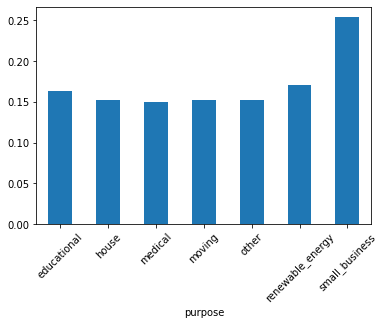

In [53]:
df_purposeChargedOff['Charged Off%'].plot.bar()
plt.xticks(rotation=45)
plt.show

In [54]:
df_purposeFullyPaid =df_purpose[df_purpose['Fully Paid%']>=df_purpose['Fully Paid%'].median()]

<function matplotlib.pyplot.show(close=None, block=None)>

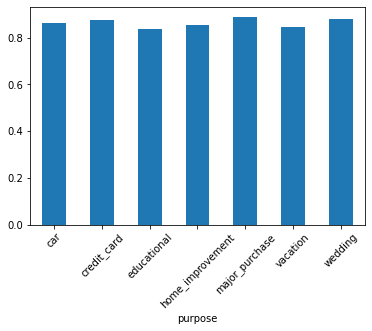

In [55]:
df_purposeFullyPaid['Fully Paid%'].plot.bar()
plt.xticks(rotation=45)
plt.show

#### Findings - Loans for the purpose of small_business and renewable_energy are risky loans as they are comprised more than median %chargedoff loans category

### 2) Loan Status - Year-Month analysis

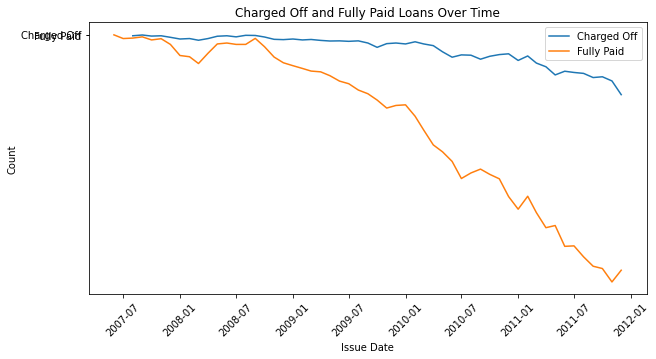

In [56]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df[df['loan_status'] == 'Charged Off'], x='issue_d', y='loan_status', estimator='count', ci=None, label='Charged Off')
sns.lineplot(data=df[df['loan_status'] == 'Fully Paid'], x='issue_d', y='loan_status', estimator='count', ci=None, label='Fully Paid')
plt.xlabel('Issue Date')
plt.ylabel('Count')
plt.title('Charged Off and Fully Paid Loans Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### The above chart doesn't give us the complete picture as we are not comparing the relative % of charged off and fully paid loans

In [57]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies', 'issue_year',
       'issue_month', 'Year-Month'],
      dtype='object')

In [58]:
df_yoy = df.pivot_table(columns = 'loan_status' ,index = 'issue_d' , values='id' , aggfunc='count')
df_yoy['Total'] = df_yoy.sum(axis=1)
df_yoy['Charged Off%'] = df_yoy['Charged Off']/df_yoy['Total']
df_yoy['Fully Paid%'] = df_yoy['Fully Paid']/df_yoy['Total']
df_yoy

loan_status,Charged Off,Current,Fully Paid,Total,Charged Off%,Fully Paid%
issue_d,,,,,,
2007-06-01,NaN,NaN,1.0,1.0,NaN,1.000000
2007-07-01,NaN,NaN,25.0,25.0,NaN,1.000000
2007-08-01,7.0,NaN,22.0,29.0,0.241379,0.758621
2007-09-01,2.0,NaN,14.0,16.0,0.125000,0.875000
2007-10-01,9.0,NaN,34.0,43.0,0.209302,0.790698
2007-11-01,7.0,NaN,26.0,33.0,0.212121,0.787879
2007-12-01,17.0,NaN,63.0,80.0,0.212500,0.787500
2008-01-01,28.0,NaN,135.0,163.0,0.171779,0.828221
2008-02-01,25.0,NaN,143.0,168.0,0.148810,0.851190


In [59]:
df_yoyChargedOff =df_yoy[df_yoy['Charged Off%']>=df_yoy['Charged Off%'].median()]
df_yoyChargedOff=df_yoyChargedOff.reset_index()

In [60]:
df_yoyFullyPaid =df_yoy[df_yoy['Fully Paid%']>=df_yoy['Fully Paid%'].median()]
df_yoyFullyPaid =df_yoyFullyPaid.reset_index()
df_yoyFullyPaid

loan_status,issue_d,Charged Off,Current,Fully Paid,Total,Charged Off%,Fully Paid%
0,2007-06-01,NaN,NaN,1.0,1.0,NaN,1.000000
1,2007-07-01,NaN,NaN,25.0,25.0,NaN,1.000000
2,2007-09-01,2.0,NaN,14.0,16.0,0.125000,0.875000
3,2008-06-01,7.0,NaN,54.0,61.0,0.114754,0.885246
4,2008-08-01,4.0,NaN,63.0,67.0,0.059701,0.940299
5,2009-01-01,28.0,NaN,201.0,229.0,0.122271,0.877729
6,2009-02-01,34.0,NaN,219.0,253.0,0.134387,0.865613
7,2009-03-01,31.0,NaN,236.0,267.0,0.116105,0.883895
8,2009-04-01,37.0,NaN,241.0,278.0,0.133094,0.866906
9,2009-05-01,41.0,NaN,266.0,307.0,0.133550,0.866450


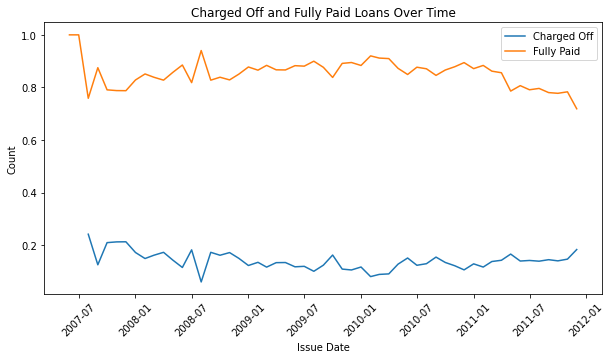

In [61]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_yoy, x='issue_d', y='Charged Off%', estimator='count', ci=None, label='Charged Off')
sns.lineplot(data=df_yoy, x='issue_d', y='Fully Paid%', estimator='count', ci=None, label='Fully Paid')
plt.xlabel('Issue Date')
plt.ylabel('Count')
plt.title('Charged Off and Fully Paid Loans Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### Findings  - The lending club has been successfully been able keep charged off % under 20% we can see a steep dip during the month July 2008 , infact we can see a decline since jan 2008, The company should check there records for the best practices followed that caused that decline
### Towards the begining of 2011 we can see the "charged of curve stablizing and even increasing towrds the end , company should deep dive to see the reason for the same.

### 3) Loan Status - term analysis

In [62]:
df_term = df.pivot_table(columns = 'loan_status' ,index = 'term' , values='id' , aggfunc='count')
df_term['Total'] = df_term.sum(axis=1)
df_term['Charged Off%'] = df_term['Charged Off']/df_term['Total']
df_term['Fully Paid%'] = df_term['Fully Paid']/df_term['Total']
df_term = df_term.reset_index()
df_term

loan_status,term,Charged Off,Current,Fully Paid,Total,Charged Off%,Fully Paid%
0,36 months,2842.0,NaN,24195.0,27037.0,0.105115,0.894885
1,60 months,2214.0,1066.0,6779.0,10059.0,0.220101,0.673924


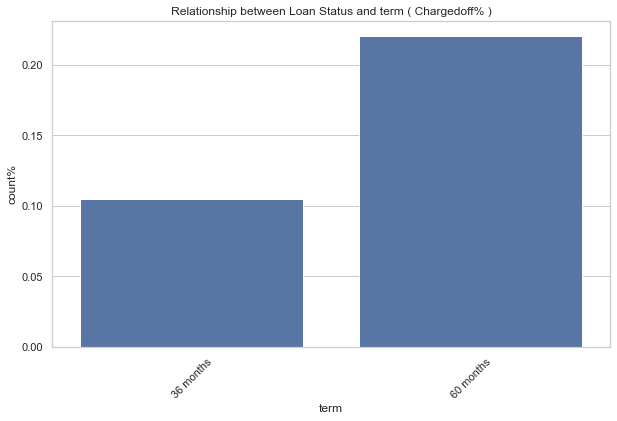

In [63]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(df_term , x='term' , y='Charged Off%')
plt.xticks(rotation=45)
plt.xlabel("term")
plt.ylabel("count%")
plt.title("Relationship between Loan Status and term ( Chargedoff% )")
plt.show()

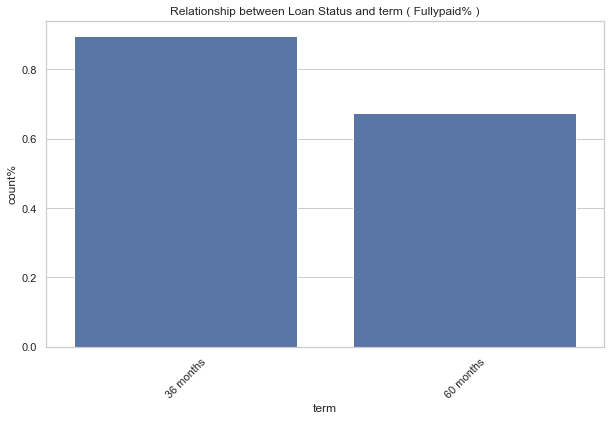

In [64]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(df_term , x='term' , y='Fully Paid%')
plt.xticks(rotation=45)
plt.xlabel("term")
plt.ylabel("count%")
plt.title("Relationship between Loan Status and term ( Fullypaid% )")
plt.show()

### Findings  - % of charged of loans increases from 10% to 22% when term of the loan is increased from 36 to 60 months i.e loans with 60 months term are more likely to default

### 4) Loan status and int_rate

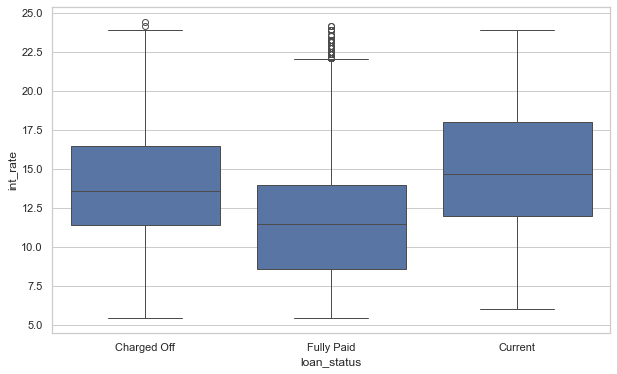

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(x= df['loan_status'] ,  y= df['int_rate'])
plt.show()

### Findings  - Clearly loans with higher int_rate are more likely to default , as there is signficant difference in the median int_rate of chargedoff and fully paid loans

### 5) Loan status and dti

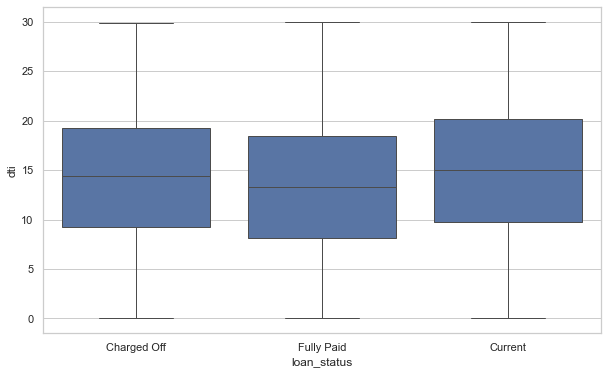

In [66]:
plt.figure(figsize=(10,6))
sns.boxplot(x= df['loan_status'] ,  y= df['dti'])
plt.show()

### Findings  - Although dti for charged off loans are slightly higher but the difference is signficanly low , hence we can't say for sure

### 6) Loan status and grade

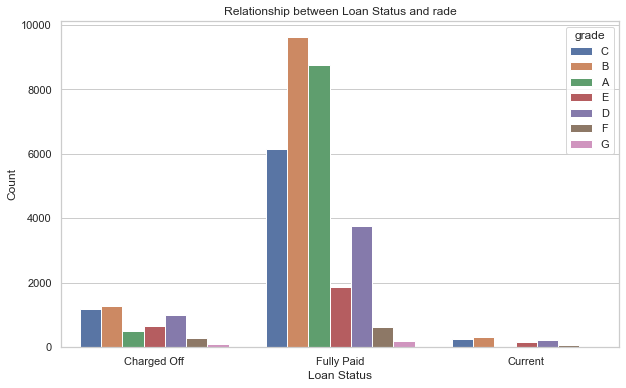

In [67]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x="loan_status", hue="grade", data=df)
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.title("Relationship between Loan Status and rade")
plt.show()

### The above chart goves directional insight that grade of the loan does varies % of charged of loans i.e they have some relationship , we will deep dive it in the next step

In [68]:
df_grade = df.pivot_table(columns = 'loan_status' ,index = 'grade' , values='id' , aggfunc='count')
df_grade['Total'] = df_grade.sum(axis=1)
df_grade['Charged Off%'] = df_grade['Charged Off']/df_grade['Total']
df_grade['Fully Paid%'] = df_grade['Fully Paid']/df_grade['Total']
df_grade = df_grade.reset_index()
df_grade

loan_status,grade,Charged Off,Current,Fully Paid,Total,Charged Off%,Fully Paid%
0,A,518,35,8745,9298,0.055711,0.940525
1,B,1281,317,9638,11236,0.114009,0.857779
2,C,1203,250,6155,7608,0.158123,0.809017
3,D,1011,212,3763,4986,0.202768,0.754713
4,E,659,169,1856,2684,0.245529,0.691505
5,F,291,67,626,984,0.295732,0.636179
6,G,93,16,191,300,0.310000,0.636667


In [69]:
df_gradeChargedOff =df_grade[df_grade['Charged Off%']>=df_grade['Charged Off%'].median()]
df_gradeChargedOff=df_gradeChargedOff.reset_index()
df_gradeChargedOff

loan_status,index,grade,Charged Off,Current,Fully Paid,Total,Charged Off%,Fully Paid%
0,3,D,1011,212,3763,4986,0.202768,0.754713
1,4,E,659,169,1856,2684,0.245529,0.691505
2,5,F,291,67,626,984,0.295732,0.636179
3,6,G,93,16,191,300,0.310000,0.636667


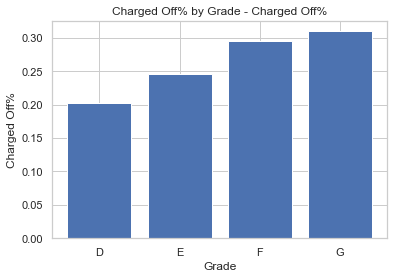

In [70]:

plt.bar(df_gradeChargedOff['grade'], df_gradeChargedOff['Charged Off%'])
plt.xlabel('Grade')
plt.ylabel('Charged Off%')
plt.title('Charged Off% by Grade - Charged Off%')
plt.show()

In [71]:
df_gradeFullyPaid =df_grade[df_grade['Fully Paid%']>=df_grade['Fully Paid%'].median()]
df_gradeFullyPaid =df_gradeFullyPaid.reset_index()
df_gradeFullyPaid

loan_status,index,grade,Charged Off,Current,Fully Paid,Total,Charged Off%,Fully Paid%
0,0,A,518,35,8745,9298,0.055711,0.940525
1,1,B,1281,317,9638,11236,0.114009,0.857779
2,2,C,1203,250,6155,7608,0.158123,0.809017
3,3,D,1011,212,3763,4986,0.202768,0.754713


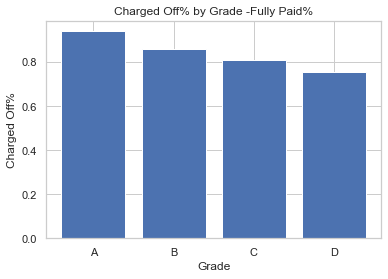

In [72]:
plt.bar(df_gradeFullyPaid['grade'], df_gradeFullyPaid['Fully Paid%'])
plt.xlabel('Grade')
plt.ylabel('Charged Off%')
plt.title('Charged Off% by Grade -Fully Paid%')
plt.show()

### Findings  - clearly Category D E F G loans are more prone to default and A B C D are more prone to be fully paid

### 7) Loan status and emp_length

In [73]:
df_emp_length = df.pivot_table(columns = 'loan_status' ,index = 'emp_length' , values='id' , aggfunc='count')
df_emp_length['Total'] = df_emp_length.sum(axis=1)
df_emp_length['Charged Off%'] = df_emp_length['Charged Off']/df_emp_length['Total']
df_emp_length['Fully Paid%'] = df_emp_length['Fully Paid']/df_emp_length['Total']
df_emp_length = df_emp_length.reset_index()
df_emp_length

loan_status,emp_length,Charged Off,Current,Fully Paid,Total,Charged Off%,Fully Paid%
0,1 year,423,67,2629,3119,0.135620,0.842898
1,10+ years,1261,379,6886,8526,0.147901,0.807647
2,2 years,540,95,3627,4262,0.126701,0.851009
3,3 years,527,81,3363,3971,0.132712,0.846890
4,4 years,439,91,2814,3344,0.131280,0.841507
5,5 years,426,86,2652,3164,0.134640,0.838180
6,6 years,293,59,1802,2154,0.136026,0.836583
7,7 years,253,59,1406,1718,0.147264,0.818393
8,8 years,194,44,1192,1430,0.135664,0.833566
9,9 years,149,31,1045,1225,0.121633,0.853061


In [74]:
df_emp_length['Charged Off%'].median()

0.13463969658659924

<Axes: >

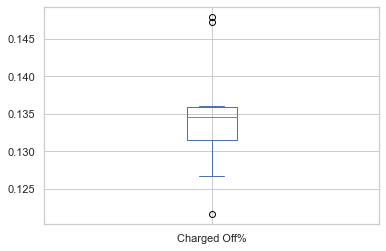

In [75]:
df_emp_length['Charged Off%'].plot.box()

In [76]:
df_emp_lengthChargedOff =df_emp_length[df_emp_length['Charged Off%']>=df_emp_length['Charged Off%'].median()]
df_emp_lengthChargedOff=df_emp_lengthChargedOff.sort_values('Charged Off%' , ascending=False).reset_index()
df_emp_lengthChargedOff

loan_status,index,emp_length,Charged Off,Current,Fully Paid,Total,Charged Off%,Fully Paid%
0,1,10+ years,1261,379,6886,8526,0.147901,0.807647
1,7,7 years,253,59,1406,1718,0.147264,0.818393
2,6,6 years,293,59,1802,2154,0.136026,0.836583
3,8,8 years,194,44,1192,1430,0.135664,0.833566
4,0,1 year,423,67,2629,3119,0.135620,0.842898
5,5,5 years,426,86,2652,3164,0.134640,0.838180


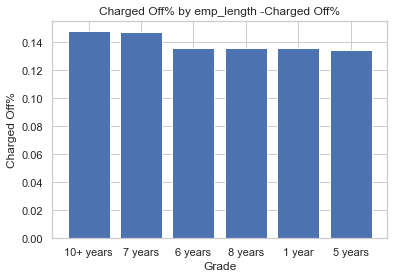

In [77]:
plt.bar(df_emp_lengthChargedOff['emp_length'], df_emp_lengthChargedOff['Charged Off%'])
plt.xlabel('Grade')
plt.ylabel('Charged Off%')
plt.title('Charged Off% by emp_length -Charged Off%')
plt.show()



# df_emp_lengthChargedOff['Charged Off%'].plot.bar(x='emp_length' )
# plt.xticks(rotation=0)
# plt.show

In [78]:
df_emp_lengthFullyPaid =df_emp_length[df_emp_length['Fully Paid%']>=df_emp_length['Fully Paid%'].median()]
df_emp_lengthFullyPaid =df_emp_lengthFullyPaid.reset_index()
df_emp_lengthFullyPaid

loan_status,index,emp_length,Charged Off,Current,Fully Paid,Total,Charged Off%,Fully Paid%
0,0,1 year,423,67,2629,3119,0.135620,0.842898
1,2,2 years,540,95,3627,4262,0.126701,0.851009
2,3,3 years,527,81,3363,3971,0.132712,0.846890
3,4,4 years,439,91,2814,3344,0.131280,0.841507
4,9,9 years,149,31,1045,1225,0.121633,0.853061
5,10,< 1 year,551,74,3558,4183,0.131724,0.850586


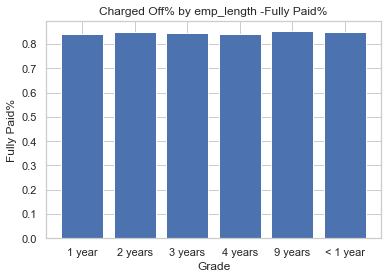

In [79]:
plt.bar(df_emp_lengthFullyPaid['emp_length'], df_emp_lengthFullyPaid['Fully Paid%'])
plt.xlabel('Grade')
plt.ylabel('Fully Paid%')
plt.title('Charged Off% by emp_length -Fully Paid%')
plt.show()



# df_emp_lengthFullyPaid['Fully Paid%'].plot.bar()
# plt.xticks(rotation=0)
# plt.show

### Findings  - emp length of 10 years+ , 7 years are more prone to default 
### one hypothesis could be since they are inthe later stae of their career they get lesser time to repay loans 
### In the later stage of the careers they mightbe having more personal liabilities and hence they default relatively more

### 8) Loan status and Home Ownership

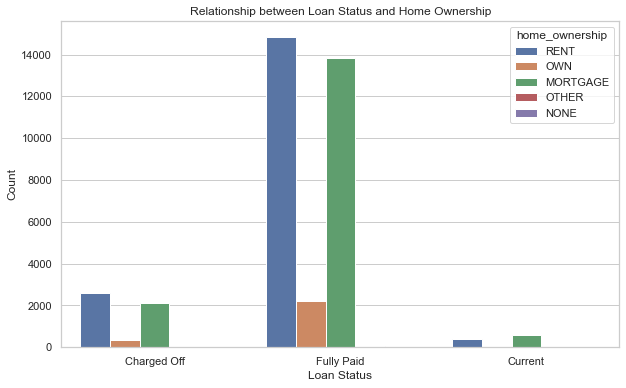

In [80]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x="loan_status", hue="home_ownership", data=df)
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.title("Relationship between Loan Status and Home Ownership")
plt.show()

#### From an initial asessment we can see the relative ratio is similar for fully paid and charged off

In [81]:
df_home_ownership = df.pivot_table(columns = 'loan_status' ,index = 'home_ownership' , values='id' , aggfunc='count')
df_home_ownership['Total'] = df_home_ownership.sum(axis=1)
df_home_ownership['Charged Off%'] = df_home_ownership['Charged Off']/df_home_ownership['Total']
df_home_ownership['Fully Paid%'] = df_home_ownership['Fully Paid']/df_home_ownership['Total']
df_home_ownership = df_home_ownership.reset_index()
df_home_ownership

loan_status,home_ownership,Charged Off,Current,Fully Paid,Total,Charged Off%,Fully Paid%
0,MORTGAGE,2103.0,597.0,13834.0,16534.0,0.127192,0.836700
1,NONE,NaN,NaN,1.0,1.0,NaN,1.000000
2,OTHER,18.0,NaN,76.0,94.0,0.191489,0.808511
3,OWN,359.0,70.0,2207.0,2636.0,0.136191,0.837253
4,RENT,2576.0,399.0,14856.0,17831.0,0.144468,0.833156


In [82]:
df_home_ownership['Charged Off%'].median()

0.1403293496033276

In [83]:
df_home_ownershipChargedOff =df_home_ownership[df_home_ownership['Charged Off%']>=df_home_ownership['Charged Off%'].median()]
df_home_ownershipChargedOff=df_home_ownershipChargedOff.sort_values('Charged Off%' , ascending=False).reset_index()
df_home_ownershipChargedOff

loan_status,index,home_ownership,Charged Off,Current,Fully Paid,Total,Charged Off%,Fully Paid%
0,2,OTHER,18.0,NaN,76.0,94.0,0.191489,0.808511
1,4,RENT,2576.0,399.0,14856.0,17831.0,0.144468,0.833156


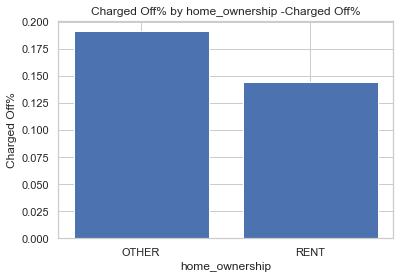

In [101]:
# df_home_ownershipChargedOff['Charged Off%'].plot.bar(x='emp_length' )
# plt.xticks(rotation=0)
# plt.show


plt.bar(df_home_ownershipChargedOff['home_ownership'], df_home_ownershipChargedOff['Charged Off%'])
plt.xlabel('home_ownership')
plt.ylabel('Charged Off%')
plt.title('Charged Off% by home_ownership -Charged Off%')
plt.show()

In [85]:
df_home_ownershipFullyPaid =df_home_ownership[df_home_ownership['Fully Paid%']>=df_home_ownership['Fully Paid%'].median()]
df_home_ownershipFullyPaid =df_home_ownershipFullyPaid.reset_index()
df_home_ownershipFullyPaid

loan_status,index,home_ownership,Charged Off,Current,Fully Paid,Total,Charged Off%,Fully Paid%
0,0,MORTGAGE,2103.0,597.0,13834.0,16534.0,0.127192,0.836700
1,1,NONE,NaN,NaN,1.0,1.0,NaN,1.000000
2,3,OWN,359.0,70.0,2207.0,2636.0,0.136191,0.837253


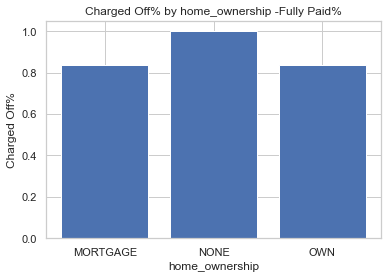

In [102]:
# df_home_ownershipFullyPaid['Fully Paid%'].plot.bar()
# plt.xticks(rotation=0)
# plt.show



plt.bar(df_home_ownershipFullyPaid['home_ownership'], df_home_ownershipFullyPaid['Fully Paid%'])
plt.xlabel('home_ownership')
plt.ylabel('Charged Off%')
plt.title('Charged Off% by home_ownership -Fully Paid%')
plt.show()

### No strong relationship has been identified between homeownership categories and chargedoff%

### 9) addr_state vs loan status

In [87]:
df_addr_state = df.pivot_table(columns = 'loan_status' ,index = 'addr_state' , values='id' , aggfunc='count')
df_addr_state['Total'] = df_addr_state.sum(axis=1)
df_addr_state['Charged Off%'] = df_addr_state['Charged Off']/df_addr_state['Total']
df_addr_state['Fully Paid%'] = df_addr_state['Fully Paid']/df_addr_state['Total']
df_addr_state = df_addr_state.reset_index()
df_addr_state

loan_status,addr_state,Charged Off,Current,Fully Paid,Total,Charged Off%,Fully Paid%
0,AK,15.0,2.0,59.0,76.0,0.197368,0.776316
1,AL,47.0,16.0,357.0,420.0,0.111905,0.850000
2,AR,25.0,9.0,194.0,228.0,0.109649,0.850877
3,AZ,106.0,25.0,663.0,794.0,0.133501,0.835013
4,CA,999.0,140.0,5477.0,6616.0,0.150998,0.827842
5,CO,84.0,25.0,621.0,730.0,0.115068,0.850685
6,CT,80.0,24.0,584.0,688.0,0.116279,0.848837
7,DC,15.0,3.0,190.0,208.0,0.072115,0.913462
8,DE,11.0,1.0,96.0,108.0,0.101852,0.888889
9,FL,454.0,81.0,2132.0,2667.0,0.170229,0.799400


In [88]:
df_addr_state['Charged Off%'].median()

0.13221990257480862

In [89]:
df_addr_stateChargedOff =df_addr_state[df_addr_state['Charged Off%']>=df_addr_state['Charged Off%'].median()]
df_addr_stateChargedOff=df_addr_stateChargedOff.sort_values('Charged Off%' , ascending=False).reset_index()
df_addr_stateChargedOff = df_addr_stateChargedOff[df_addr_stateChargedOff['Total']>5]
df_addr_stateChargedOff

# We are ignoring loans we total count less than 5

loan_status,index,addr_state,Charged Off,Current,Fully Paid,Total,Charged Off%,Fully Paid%
1,32,NV,97.0,18.0,348.0,463.0,0.209503,0.751620
3,0,AK,15.0,2.0,59.0,76.0,0.197368,0.776316
4,40,SD,10.0,2.0,46.0,58.0,0.172414,0.793103
5,9,FL,454.0,81.0,2132.0,2667.0,0.170229,0.799400
6,31,NM,28.0,4.0,140.0,172.0,0.162791,0.813953
7,11,HI,26.0,8.0,128.0,162.0,0.160494,0.790123
8,10,GA,201.0,38.0,1076.0,1315.0,0.152852,0.818251
9,24,MO,96.0,15.0,522.0,633.0,0.151659,0.824645
10,4,CA,999.0,140.0,5477.0,6616.0,0.150998,0.827842
11,36,OR,63.0,15.0,340.0,418.0,0.150718,0.813397


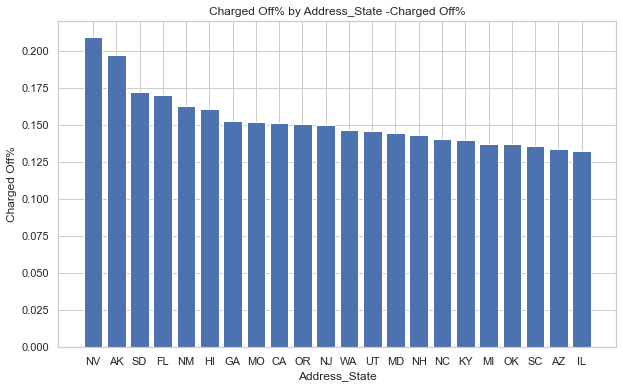

In [105]:
# plt.figure(figsize=(10, 6))
# df_addr_stateChargedOff['Charged Off%'].plot.bar( )
# plt.xticks(rotation=0)
# plt.show



plt.figure(figsize=(10, 6))
plt.bar(df_addr_stateChargedOff['addr_state'], df_addr_stateChargedOff['Charged Off%'])
plt.xlabel('Address_State')
plt.ylabel('Charged Off%')
plt.title('Charged Off% by Address_State -Charged Off%')
plt.show()

In [91]:
df_addr_stateFullyPaid =df_addr_state[df_addr_state['Fully Paid%']>=df_addr_state['Fully Paid%'].median()]
df_addr_stateFullyPaid =df_addr_stateFullyPaid.reset_index()
df_addr_stateFullyPaid

loan_status,index,addr_state,Charged Off,Current,Fully Paid,Total,Charged Off%,Fully Paid%
0,1,AL,47.0,16.0,357.0,420.0,0.111905,0.850000
1,2,AR,25.0,9.0,194.0,228.0,0.109649,0.850877
2,5,CO,84.0,25.0,621.0,730.0,0.115068,0.850685
3,6,CT,80.0,24.0,584.0,688.0,0.116279,0.848837
4,7,DC,15.0,3.0,190.0,208.0,0.072115,0.913462
5,8,DE,11.0,1.0,96.0,108.0,0.101852,0.888889
6,12,IA,NaN,NaN,5.0,5.0,NaN,1.000000
7,15,IN,NaN,NaN,9.0,9.0,NaN,1.000000
8,16,KS,24.0,16.0,211.0,251.0,0.095618,0.840637
9,18,LA,45.0,9.0,353.0,407.0,0.110565,0.867322


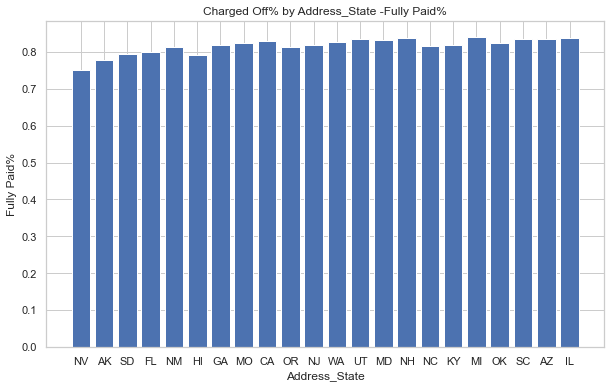

In [106]:
# plt.figure(figsize=(10, 6))
# df_addr_stateFullyPaid['Fully Paid%'].plot.bar()
# plt.xticks(rotation=0)
# plt.show



plt.figure(figsize=(10, 6))
plt.bar(df_addr_stateChargedOff['addr_state'], df_addr_stateChargedOff['Fully Paid%'])
plt.xlabel('Address_State')
plt.ylabel('Fully Paid%')
plt.title('Charged Off% by Address_State -Fully Paid%')
plt.show()

### Findings -  states - NV, AK,SD, FL,NM,HI,GA,MO,CA... states with charged off% more than median chargedoff% should be further anlayzed as they are prone to default loans

### 10) loan_status vs inq_last_6mths

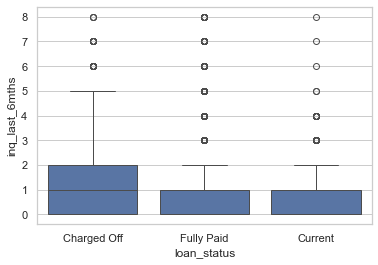

In [93]:
sns.boxplot(x= df['loan_status'] ,  y= df['inq_last_6mths'])
plt.show()

### Findings -  Chargedoff loans have significantly more number of inquiries in past 6 months ascompared to fully paid loans

### 11) loan_status vs pub_rec

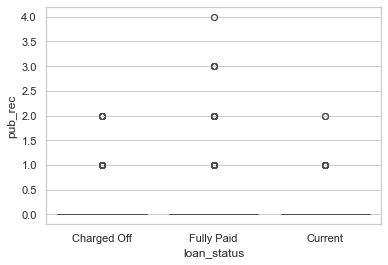

In [94]:
sns.boxplot(x= df['loan_status'] ,  y= df['pub_rec'])
plt.show()

#### Due to high count of loans with pub_rec = 0 above chart is not helpful
#### We can analyze in the range 0<pub_rec<3

In [95]:
df_pub_rec = df[(df['pub_rec']>0) & (df['pub_rec']<3) ]

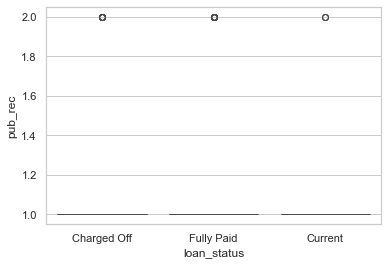

In [96]:
sns.boxplot(x= df_pub_rec['loan_status'] ,  y= df_pub_rec['pub_rec'])
plt.show()

### There is not clear relationship between pub_rec and loan status inferred from the above chart

### 12) revol_util vs loan status

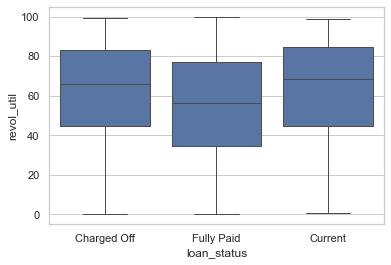

In [97]:
sns.boxplot(x= df_pub_rec['loan_status'] ,  y= df_pub_rec['revol_util'])
plt.show()

### We can infer that higher Revolving line utilization rate can be an correlated indicator of default loans

### 13) total_acc vs loan_status

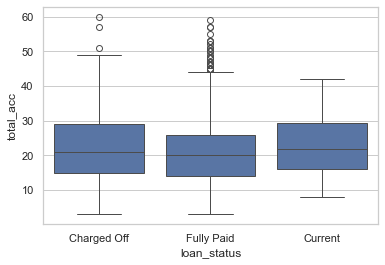

In [98]:
sns.boxplot(x= df_pub_rec['loan_status'] ,  y= df_pub_rec['total_acc'])
plt.show()

### We can infer that higher # of credit lines currently in the borrower's credit file can be an correlated indicator of default loans as the median is more in case of chargedoff loans

### 14) pub_rec_bankruptcies vs loan_status

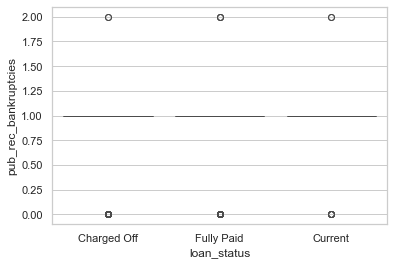

In [99]:
sns.boxplot(x= df_pub_rec['loan_status'] ,  y= df_pub_rec['pub_rec_bankruptcies'])
plt.show()

### There is not clear relationship between pub_rec_bankruptcies and loan status inferred from the above chart as maximum # of loans have 1 pub_rec_bankruptcies